In [136]:
"""
Training/Validation/Testing
│
└─── 00000
│   │
│   └─── FLAIR
│   │   │ Image.nii.gz
│   │   
│   └─── T1
│   │   │ Image.nii.gz
│   │   
│   └─── T1CE
│   │   │ Image.nii.gz
│   │   
│   └─── T2
│   │   │ Image.nii.gz
|   |   
|   |___ Segmentation
|   |   | Image.nii.gz
│   
└─── 00001
│
│ ... 
│ ...   
│   
└─── 00002
"""

"""
- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)
- view an image - look into: can you have multiple windows for MRIcro
- also look at the viewer thing in colab

then i can do preprocessing
"""

'\n- extracting (called "open" on the file viewer) all the files with ".nii.gz" (basically getting all the files)\n- view an image - look into: can you have multiple windows for MRIcro\n- also look at the viewer thing in colab\n\nthen i can do preprocessing\n'

In [137]:
# download files from google drive
!gdown --id 17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17_VDkS9f0QA8IIGqdWFgm6d2JASBtILt
To: /content/brats_120_images.zip
100% 235M/235M [00:00<00:00, 271MB/s]


In [138]:
# unzip .zip file to get the NiFTI files
!unzip /content/brats_120_images.zip

Archive:  /content/brats_120_images.zip
replace brats_120_images/BraTS2021_00025_seg.nii? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import glob
"""
glob.glob
you can have a function for retrieving the file paths by having a variable for each of the volumes + segmented
e.x. for a segmentation file:
"/Users/shizacharania/Desktop/brats_data/RSNA_ASNR_MICCAI_BraTS2021_TrainingData_16July2021/BraTS2021_00000_seg.nii"
then you would look for the "BraTS2021_" in the beginning and the "*/*" stuff and then the "_seg.nii" (the extracted nifti files dont have ".gz")
"""

# get root paths of mri scans with flair modalities
flair_paths = glob.glob("*/*_flair.nii")
flair_paths = sorted(flair_paths)
print(flair_paths)
print(len(flair_paths))

# get root paths of mri scans with t1 modalities
t1_paths = glob.glob("*/*_t1.nii")
t1_paths = sorted(t1_paths)
print(t1_paths)
print(len(t1_paths))

# get root paths of mri scans with t1ce modalities
t1ce_paths = glob.glob("*/*_t1ce.nii")
t1ce_paths = sorted(t1ce_paths)
print(t1ce_paths)
print(len(t1ce_paths))

# get root paths of mri scans with t2 modalities
t2_paths = glob.glob("*/*_t2.nii")
t2_paths = sorted(t2_paths)
print(t2_paths)
print(len(t2_paths))

# get root paths of mri scans with segmentations
seg_paths = glob.glob("*/*_seg.nii")
seg_paths = sorted(seg_paths)
print(seg_paths)
print(len(seg_paths))

all = glob.glob("*/*.nii")
print(24*5==len(all))

In [140]:
# /content/brats_data_992/BraTS2021_00275_flair.nii

# generate the file paths for flair modality
for i in range(len(flair_paths)):
  flair_paths[i] = "/content/" + flair_paths[i]

# generate the file paths for t1 modality
for i in range(len(t1_paths)):
  t1_paths[i] = "/content/" + t1_paths[i]

# generate the file paths for t1ce modality
for i in range(len(t1ce_paths)):
  t1ce_paths[i] = "/content/" + t1ce_paths[i]

# generate the file paths for t2 modality
for i in range(len(t2_paths)):
  t2_paths[i] = "/content/" + t2_paths[i]

# generate the file paths for the segmentations
for i in range(len(seg_paths)):
  seg_paths[i] = "/content/" + seg_paths[i]

# print the first element of each file path to ensure it works
print(flair_paths[0])
print(t1_paths[0])
print(t1ce_paths[0])
print(t2_paths[0])
print(seg_paths[0])

/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00000_seg.nii


In [141]:
"""
my approach to visualize 3d images:
- use simpleitk (sitk)
   - i need to load the images into sitk format and then convert it into a numpy array

- from a numpy array, i need to do 2 tasks
    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices

look into basics of simpleitk - how to read the file and then convert it into np.array()
look into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio
look into what fatemeh did: https://youtu.be/rBIetBho0x4
"""

'\nmy approach to visualize 3d images:\n- use simpleitk (sitk)\n   - i need to load the images into sitk format and then convert it into a numpy array\n\n- from a numpy array, i need to do 2 tasks\n    1. i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that\n    2. i will visualize the 3d image entirely and have a scrolling feature that goes through these 2d array slices\n\nlook into basics of simpleitk - how to read the file and then convert it into np.array()\nlook into "Exploring 3D images with Matplotlib" - https://www.youtube.com/watch?v=5jQVQE6yfio\nlook into what fatemeh did: https://youtu.be/rBIetBho0x4\n'

In [142]:
!pip install SimpleITK

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [143]:
import SimpleITK as sitk

In [144]:
# reading a file in simpleitk (sitk)

# lists of numpy arrays for each modality + the segmentations
flair_nparrays = []
t1_nparrays = []
t1ce_nparrays = []
t2_nparrays = []
seg_nparrays = []

# converting all the flair modality file paths into np arrays
for flair_imagepath in flair_paths:
  img = sitk.ReadImage(flair_imagepath)
  img = sitk.GetArrayFromImage(img)
  flair_nparrays.append(img)

# converting all the t1 modality file paths into np arrays
for t1_imagepath in t1_paths:
  img = sitk.ReadImage(t1_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1_nparrays.append(img)

# converting all the t1ce modality file paths into np arrays
for t1ce_imagepath in t1ce_paths:
  img = sitk.ReadImage(t1ce_imagepath)
  img = sitk.GetArrayFromImage(img)
  t1ce_nparrays.append(img)

# converting all the t2 modality file paths into np arrays
for t2_imagepath in t2_paths:
  img = sitk.ReadImage(t2_imagepath)
  img = sitk.GetArrayFromImage(img)
  t2_nparrays.append(img)

# converting all the segmentations file paths into np arrays
for seg_imagepath in seg_paths:
  img = sitk.ReadImage(seg_imagepath)
  img = sitk.GetArrayFromImage(img)
  seg_nparrays.append(img)

In [145]:
# checking the length of all the lists (containing the numpy arrays)
print(len(flair_nparrays))
print(len(t1_nparrays))
print(len(t1ce_nparrays))
print(len(t2_nparrays))
print(len(seg_nparrays))

24
24
24
24
24


In [146]:
# i will look at a stack of 2d arrays (that form a 3d image) and visualize the slices for that
import matplotlib.pyplot as plt
import numpy

In [147]:
from ipywidgets import interact, interactive, IntSlider, ToggleButtons # used for slider visualization

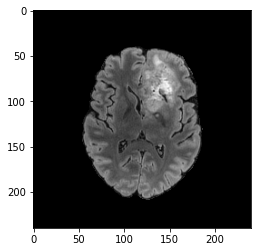

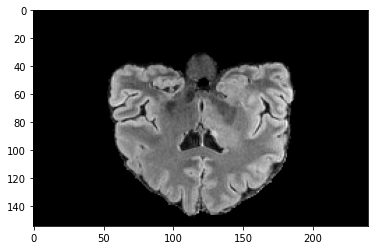

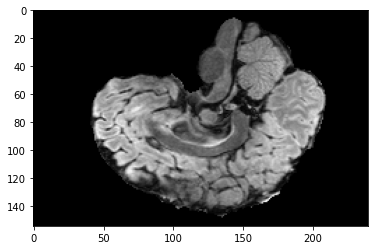

In [148]:
# axial
brain_slice = flair_nparrays[0][77, :, :] # changing Z from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

# sagittal
brain_slice = flair_nparrays[0][:, 120, :] # changing X from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

# coronal
brain_slice = flair_nparrays[0][:, :, 120] # changing Y from [Z,X,Y], which is [155,240,240]
plt.imshow(brain_slice, cmap="gray")
plt.show()

Flair Example:
/content/brats_120_images/BraTS2021_00000_flair.nii
/content/brats_120_images/BraTS2021_00002_flair.nii
/content/brats_120_images/BraTS2021_00003_flair.nii
/content/brats_120_images/BraTS2021_00005_flair.nii
/content/brats_120_images/BraTS2021_00006_flair.nii
/content/brats_120_images/BraTS2021_00008_flair.nii
/content/brats_120_images/BraTS2021_00009_flair.nii
/content/brats_120_images/BraTS2021_00011_flair.nii
/content/brats_120_images/BraTS2021_00012_flair.nii
/content/brats_120_images/BraTS2021_00014_flair.nii


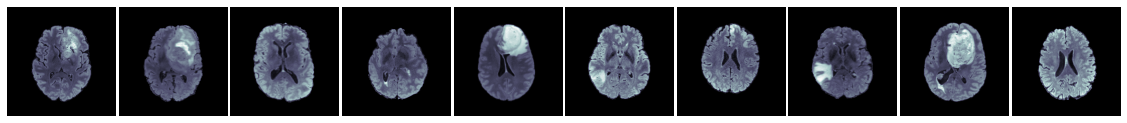

In [149]:
slice_num = 77 # 155/2 = approx. 77
nrows = 10
ncols = 10

plt.figure(figsize=(20,20))

print("Flair Example:")
for i in range(10): # plotting 10 images
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(flair_paths[i])
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :], cmap="bone") # slices of the scan in flair
plt.show()

T1 Example:
/content/brats_120_images/BraTS2021_00000_t1.nii
/content/brats_120_images/BraTS2021_00002_t1.nii
/content/brats_120_images/BraTS2021_00003_t1.nii
/content/brats_120_images/BraTS2021_00005_t1.nii
/content/brats_120_images/BraTS2021_00006_t1.nii
/content/brats_120_images/BraTS2021_00008_t1.nii
/content/brats_120_images/BraTS2021_00009_t1.nii
/content/brats_120_images/BraTS2021_00011_t1.nii
/content/brats_120_images/BraTS2021_00012_t1.nii
/content/brats_120_images/BraTS2021_00014_t1.nii


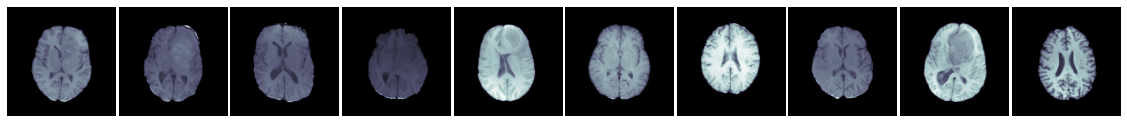

In [150]:
plt.figure(figsize=(20,20))

print("T1 Example:")
for i in range(10): # plotting 10 images
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1_paths[i])
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :], cmap="bone") # slices of the scan in t1
plt.show()

T1CE Example:
/content/brats_120_images/BraTS2021_00000_t1ce.nii
/content/brats_120_images/BraTS2021_00002_t1ce.nii
/content/brats_120_images/BraTS2021_00003_t1ce.nii
/content/brats_120_images/BraTS2021_00005_t1ce.nii
/content/brats_120_images/BraTS2021_00006_t1ce.nii
/content/brats_120_images/BraTS2021_00008_t1ce.nii
/content/brats_120_images/BraTS2021_00009_t1ce.nii
/content/brats_120_images/BraTS2021_00011_t1ce.nii
/content/brats_120_images/BraTS2021_00012_t1ce.nii
/content/brats_120_images/BraTS2021_00014_t1ce.nii


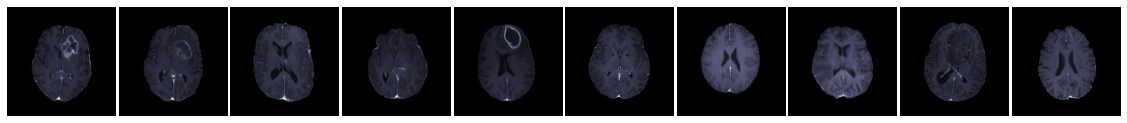

In [151]:
plt.figure(figsize=(20,20))

print("T1CE Example:")
for i in range(10): # plotting 10 images
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t1ce_paths[i])
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :], cmap="bone") # slices of the scan in t1
plt.show()

T2 Example:
/content/brats_120_images/BraTS2021_00000_t2.nii
/content/brats_120_images/BraTS2021_00002_t2.nii
/content/brats_120_images/BraTS2021_00003_t2.nii
/content/brats_120_images/BraTS2021_00005_t2.nii
/content/brats_120_images/BraTS2021_00006_t2.nii
/content/brats_120_images/BraTS2021_00008_t2.nii
/content/brats_120_images/BraTS2021_00009_t2.nii
/content/brats_120_images/BraTS2021_00011_t2.nii
/content/brats_120_images/BraTS2021_00012_t2.nii
/content/brats_120_images/BraTS2021_00014_t2.nii


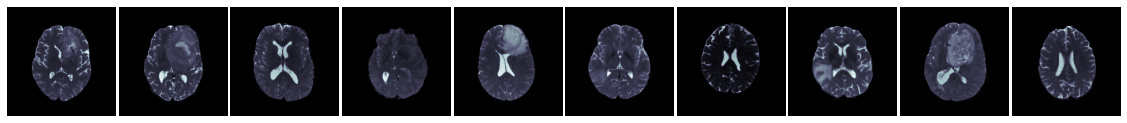

In [152]:
plt.figure(figsize=(20,20))

print("T2 Example:")
for i in range(10): # plotting 10 images
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(t2_paths[i])
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :], cmap="bone") # slices of the scan in t2
plt.show()

Segmentations Example:
/content/brats_120_images/BraTS2021_00000_seg.nii
/content/brats_120_images/BraTS2021_00002_seg.nii
/content/brats_120_images/BraTS2021_00003_seg.nii
/content/brats_120_images/BraTS2021_00005_seg.nii
/content/brats_120_images/BraTS2021_00006_seg.nii
/content/brats_120_images/BraTS2021_00008_seg.nii
/content/brats_120_images/BraTS2021_00009_seg.nii
/content/brats_120_images/BraTS2021_00011_seg.nii
/content/brats_120_images/BraTS2021_00012_seg.nii
/content/brats_120_images/BraTS2021_00014_seg.nii


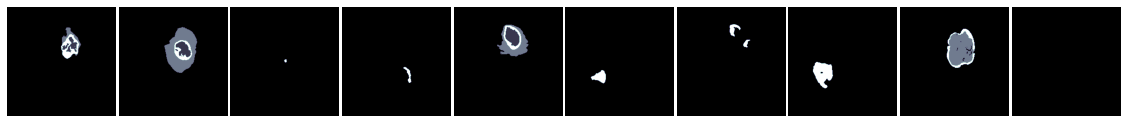

In [153]:
plt.figure(figsize=(20,20))

print("Segmentations Example:")
for i in range(10): # plotting 10 images
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  print(seg_paths[i])
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :], cmap="bone")  # slices of the segmentation
plt.show()

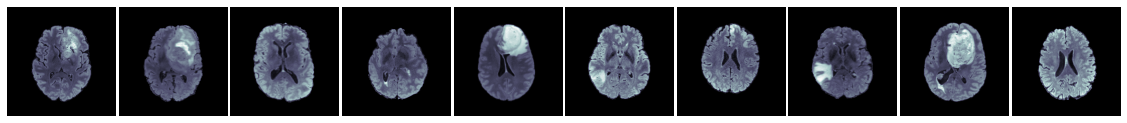

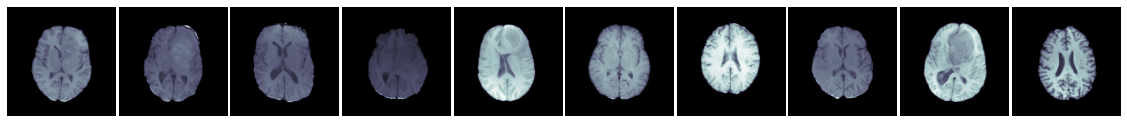

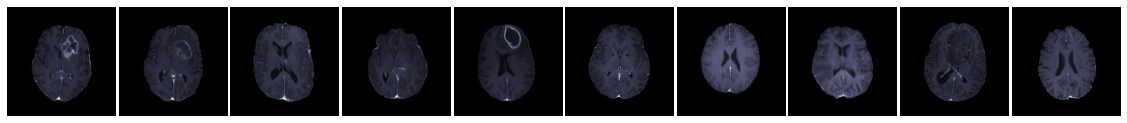

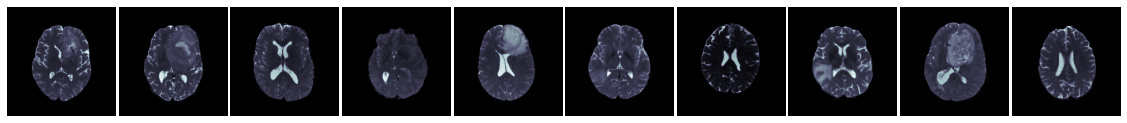

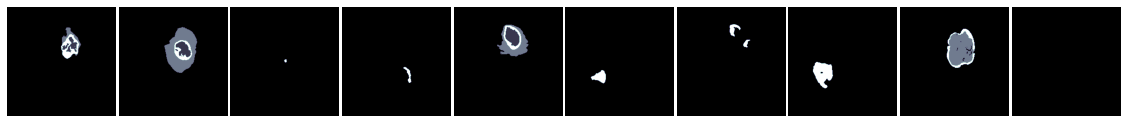

In [154]:
# taking the panels from the above cells and merging them

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_flair = flair_nparrays[i]
  plt.imshow(ex_img_flair[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1 = t1_nparrays[i]
  plt.imshow(ex_img_t1[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t1ce = t1ce_nparrays[i]
  plt.imshow(ex_img_t1ce[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_t2 = t2_nparrays[i]
  plt.imshow(ex_img_t2[slice_num, :, :], cmap="bone")
plt.show()

plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,10,i+1)
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.axis("off")
  ex_img_seg = seg_nparrays[i]
  plt.imshow(ex_img_seg[slice_num,:, :], cmap="bone")
plt.show()

In [155]:
import numpy as np

images_arrays = flair_nparrays+t1_nparrays+t1ce_nparrays+t2_nparrays # putting all the modalities into one list
seg_arrays = seg_nparrays
print(len(images_arrays))
print(len(seg_arrays))
print(images_arrays[0].shape)

96
24
(155, 240, 240)


In [156]:
patient= 0 # you can change this - takes that certain element in the list

@interact # https://youtu.be/rBIetBho0x4 <-- guided visualization from this video
def explore_3d_image(slice=(0,154), modality=["flair", "t1", "t1ce", "t2", "seg"], view=["axial", "coronal", "sagittal"]):
  # being able to change the modalities
  if modality=="flair":
    img = flair_nparrays[patient]
  elif modality=="t1":
    img = t1_nparrays[patient]
  elif modality=="t1ce":
    img = t1ce_nparrays[patient]
  elif modality=="t2":
    img = t2_nparrays[patient]
  elif modality=="seg":
    img = seg_nparrays[patient]

  print()
  plt.title('Exploring Slices of the Image Data', fontsize=10)
  # being able to change the plane it is viewed in
  if view == "axial":
    img=img[slice, :, :]
  elif view == "coronal":
    img=img[:, :, slice]
  elif view == "sagittal":
    img=img[:, slice, :]

  plt.imshow(img, cmap="bone")
  plt.show()

interactive(children=(IntSlider(value=77, description='slice', max=154), Dropdown(description='modality', opti…

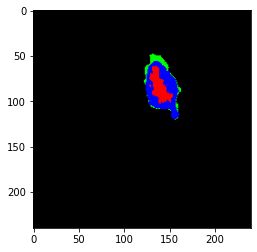

In [157]:
"""
- annotated manually- one to four raters + were approved by experienced neuro-radiologists
- Annotations comprise the
    - GD-enhancing tumor (ET — label 4)
    - peritumoral edematous/invaded tissue (ED — label 2)
    - necrotic tumor core (NCR — label 1)
"""

slice_index = 65
# just for visualization and to see color - will not permantly change the color slices (also we're just doing it to slices to view it)

for i in seg_nparrays:
  color_seg = np.zeros((240,240,3))
  gray_segmentation = i[slice_index,:,:]
  color_seg[gray_segmentation==1] = [255,0,0] # red - if in the array the value is 1 - NECROTIC TUMOUR CORE (NCR — label 1)
  color_seg[gray_segmentation==2] = [0,255,0] # green - if in the array the value is 2 - PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)
  color_seg[gray_segmentation==4] = [0,0,255] # blue - GD-ENHANCING TUMOUR (ET — label 4)
  plt.imshow(color_seg, cmap="bone")
  plt.show()
  break

# its because the annotations already have labels - so pixels that have 1 are necrotic tumour, pixels that have 2 are ed and pixels that have 7 are enhancing tumour
# so i dont think i should be changing it into range of 0-1 for preprocessing anyways

In [158]:
import math
import numpy as np
import cv2
import torch
import torchvision
from torchvision import transforms

In [159]:
# measuring the scale for downsampling
def find_scale(size):
   return 128/size

In [160]:
from scipy.ndimage import zoom

def preprocess_resize(np_arrays): # resizing each volume to (128,128,128)
  new_arrays = []
  for i in range(len(np_arrays)): # each volume
    img = np_arrays[i]
    # print(img.shape) # (155, 240, 240)
    a = zoom(input=img, zoom=(find_scale(img.shape[0]), find_scale(img.shape[1]), find_scale(img.shape[2])), order=0)
    # print(a.shape) # (128, 128, 128)
    new_arrays.append(a)
  return new_arrays

In [161]:
# check if the preprocess_resize function works
resized_t1_nparrays = preprocess_resize(t1_nparrays)
print(len(resized_t1_nparrays))
print(resized_t1_nparrays[0].shape)

24
(128, 128, 128)


In [162]:
all_nparrays = [flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays]
image_data = []

In [163]:
# resizing all the image arrays
resized_arrs = []
for modality_arr in all_nparrays:
  resized_arr = preprocess_resize(modality_arr)
  print(resized_arr[0].shape)
  resized_arrs.append(resized_arr)

(128, 128, 128)
(128, 128, 128)
(128, 128, 128)
(128, 128, 128)


In [164]:
# checking if the resizing worked
print(len(resized_arrs))
print(resized_arrs[1][0].shape)

4
(128, 128, 128)


In [ ]:
# visualization
sample = resized_arrs[0][0]
print(sample.shape)
print(sample[0].shape)

labels = ["NECROTIC TUMOUR CORE (NCR — label 1)", "GD-ENHANCING TUMOUR (ET — label 4)", "PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)"]
for i in range(sample.shape[0]):
  plt.imshow(sample[i, :, :], cmap="bone")
  # print(str(i+1), labels[i])
  # brain_slice = sample[i][65, :, :] # [0] -> NECROTIC TUMOUR CORE
  # plt.imshow(brain_slice)
  plt.show()
  print(sample[i, :, :])

In [166]:
# ensuring the resizing worked for the segmentations
print(len(seg_nparrays))
resizedsegarr = preprocess_resize(seg_nparrays)
print(resized_arr[0].shape)

24
(128, 128, 128)


In [167]:
"""
my standard deviation is very similar, but there’s a difference by a few decimal points.
Darien mentioned in one of our first calls a few weeks ago that the values when done manually and with numpy might be a bit off,
so im curious to know why that might be the case

matlab/pandas and numpy have diff answers because matlab has unbiased estimator
(https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results)
but here im following the exact formula in numpy

those differences accumulate in order to have a few values off in the final std of the whole dataset. is that okay? even then, why is it the case?

https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html <-- also tried new formula, but didn't work (showed error)
"""

"\nmy standard deviation is very similar, but there’s a difference by a few decimal points.\nDarien mentioned in one of our first calls a few weeks ago that the values when done manually and with numpy might be a bit off,\nso im curious to know why that might be the case\n\nmatlab/pandas and numpy have diff answers because matlab has unbiased estimator\n(https://www.aboutdatablog.com/post/why-computing-standard-deviation-in-pandas-and-numpy-yields-different-results)\nbut here im following the exact formula in numpy\n\nthose differences accumulate in order to have a few values off in the final std of the whole dataset. is that okay? even then, why is it the case?\n\nhttps://kozodoi.me/python/deep%20learning/pytorch/tutorial/2021/03/08/image-mean-std.html <-- also tried new formula, but didn't work (showed error)\n"

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


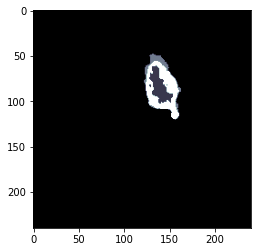

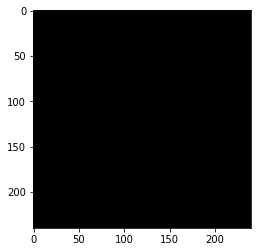

NECROTIC TUMOUR CORE (NCR — label 1)


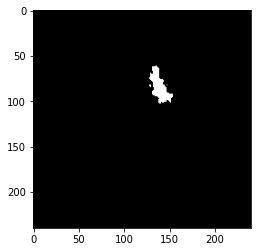

GD-ENHANCING TUMOUR (ET — label 2)


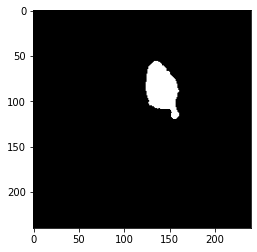

PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)


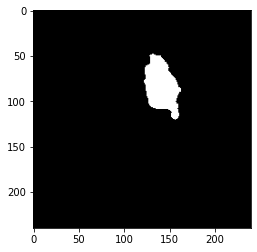

In [168]:
"""
- annotated manually- one to four raters + were approved by experienced neuro-radiologists
- Annotations comprise the
    - GD-enhancing tumor (ET — label 4)
    - peritumoral edematous/invaded tissue (ED — label 2)
    - necrotic tumor core (NCR — label 1)

My modified annotations
    - GD-enhancing tumor (ET — label 2)
    - peritumoral edematous/invaded tissue (ED — label 3)
    - necrotic tumor core (NCR — label 1)
"""

slice_index = 65
# just for visualization and to see color - will not permantly change the color slices (also we're just doing it to slices to view it)

for i in seg_nparrays:
  color_seg = np.zeros((240,240,3))
  gray_segmentation = i[slice_index,:,:]
  print(gray_segmentation==1)
  plt.imshow(gray_segmentation, cmap="bone")
  plt.show()
  plt.imshow(color_seg, cmap="bone")
  plt.show()
  # testing method to split the multiclass 1 channel into multilabel 3 channel
  print("NECROTIC TUMOUR CORE (NCR — label 1)")
  color_seg[gray_segmentation==1] = [1,1,1] # red - if in the array the value is 1 - NECROTIC TUMOUR CORE (NCR — label 1)
  color_seg[gray_segmentation==2] = [0,0,0] # green - if in the array the value is 2 - PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)
  color_seg[gray_segmentation==4] = [0,0,0] # blue - GD-ENHANCING TUMOUR (ET — label 4)
  plt.imshow(color_seg, cmap="bone")
  plt.show()
  # made label 3 because we want index to be consistent with 0,1,2,3
  print("GD-ENHANCING TUMOUR (ET — label 2)")
  color_seg[gray_segmentation==1] = [3,3,3] # red - if in the array the value is 1 - NECROTIC TUMOUR CORE (NCR — label 1)
  color_seg[gray_segmentation==2] = [0,0,0] # green - if in the array the value is 2 - PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)
  color_seg[gray_segmentation==4] = [3,3,3] # blue - GD-ENHANCING TUMOUR (ET — label 4)
  plt.imshow(color_seg, cmap="bone")
  plt.show()

  print("PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)")
  color_seg[gray_segmentation==1] = [2,2,2] # red - if in the array the value is 1 - NECROTIC TUMOUR CORE (NCR — label 1)
  color_seg[gray_segmentation==2] = [2,2,2] # green - if in the array the value is 2 - PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)
  color_seg[gray_segmentation==4] = [2,2,2] # blue - GD-ENHANCING TUMOUR (ET — label 4)
  plt.imshow(color_seg, cmap="bone")
  plt.show()
  break

# its because the annotations already have labels - so pixels that have 1 are necrotic tumour, pixels that have 2 are ed and pixels that have 7 are enhancing tumour
# so i dont think i should be changing it into range of 0-1 for preprocessing anyways

In [ ]:
expanded_seg_arrays = np.zeros((len(seg_nparrays),3,128,128,128)) # blank segmentation to store the binary gt masks in
print(expanded_seg_arrays.shape)
# for loop to go through all segmentations
img_count = 0
for multiclass_mask_seg in seg_nparrays:
  # take each multiclass mask segmentation
  print(multiclass_mask_seg.shape)
  print()
  # for loop through all slices in each
  binaryslices_value1 = np.zeros((155,240,240))
  binaryslices_value2 = np.zeros((155,240,240))
  binaryslices_value3 = np.zeros((155,240,240))
  for i in range (len(multiclass_mask_seg)): # 155 slices
    slice =  multiclass_mask_seg[i,:,:] # slices shown properly
    binaryslice_value1 = np.zeros((240,240))
    binaryslice_value2 = np.zeros((240,240))
    binaryslice_value3 = np.zeros((240,240))
    for s in range(len(slice)):
      # changing the multiclass 1 channel into multilabel 3 channels
      # append slices to binaryslices_valuex - each one should be 240x240
      binaryslice_value1[slice==1] = [1]
      binaryslice_value1[slice==2] = [0]
      binaryslice_value1[slice==4] = [0]

      # change to label of 3
      binaryslice_value2[slice==1] = [3]
      binaryslice_value2[slice==2] = [0]
      binaryslice_value2[slice==4] = [3]

      binaryslice_value3[slice==1] = [2]
      binaryslice_value3[slice==2] = [2]
      binaryslice_value3[slice==4] = [2]

    # plt.imshow(binaryslice_value1, cmap="bone")
    # plt.show()
    # plt.imshow(binaryslice_value2, cmap="bone")
    # plt.show()
    # plt.imshow(binaryslice_value4, cmap="bone")
    # plt.show()
    binaryslices_value1[i,:,:] = binaryslice_value1 # taking the slice
    binaryslices_value2[i,:,:] = binaryslice_value2  # taking the slice
    binaryslices_value3[i,:,:] = binaryslice_value3  # taking the slice
  print(binaryslices_value1.shape)
  print(binaryslices_value2.shape)
  print(binaryslices_value3.shape)

  # resizing should happen after splitting into the binary
  resized_binaryslices1 = zoom(input=binaryslices_value1, zoom=(find_scale(binaryslices_value1.shape[0]), find_scale(binaryslices_value1.shape[1]), find_scale(binaryslices_value1.shape[2])), order=0)
  resized_binaryslices2 = zoom(input=binaryslices_value2, zoom=(find_scale(binaryslices_value2.shape[0]), find_scale(binaryslices_value2.shape[1]), find_scale(binaryslices_value2.shape[2])), order=0)
  resized_binaryslices3 = zoom(input=binaryslices_value3, zoom=(find_scale(binaryslices_value3.shape[0]), find_scale(binaryslices_value3.shape[1]), find_scale(binaryslices_value3.shape[2])), order=0)

  print(resized_binaryslices1.shape) # should be 128, 128, 128
  print(resized_binaryslices2.shape)
  print(resized_binaryslices3.shape)

  print()

  # 1 is smallest, then 2, and then 3
  binary_masks = np.array([resized_binaryslices1, resized_binaryslices2, resized_binaryslices3]) # should be 3x128x128x128
  print()
  print(binary_masks.shape)
  print(img_count)
  print(expanded_seg_arrays[img_count].shape)
  expanded_seg_arrays[img_count] = binary_masks # in the end expanded_seg_arrays should be len(resized_arrs[4]),3x128x128x128)
  img_count += 1
  # break # for now

# make the multiclass mask have 3 versions (binary masks)
# make the binary masks 3 channels [[binarymask1], [binarymask2], [binarymask3]]
# store this in expanded_seg_arrays which is np.zeros((len(resized_arrs[4]),3,128,128,128))

In [170]:
# checking if the concatenation of ground truth masks worked
print(expanded_seg_arrays.shape)
print(expanded_seg_arrays[0].shape)
print(expanded_seg_arrays[0][0].shape)

(24, 3, 128, 128, 128)
(3, 128, 128, 128)
(128, 128, 128)


128
1


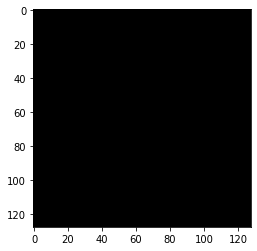

(128, 128)
2


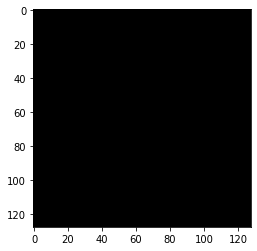

(128, 128)
3


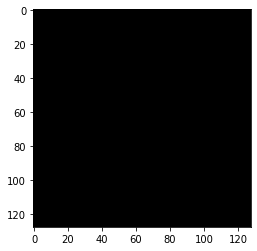

(128, 128)
4


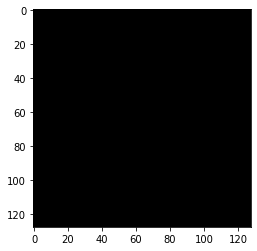

(128, 128)
5


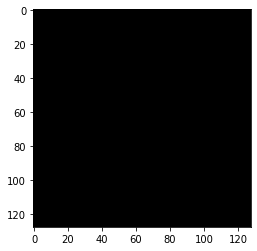

(128, 128)
6


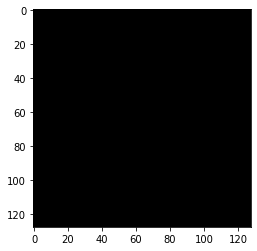

(128, 128)
7


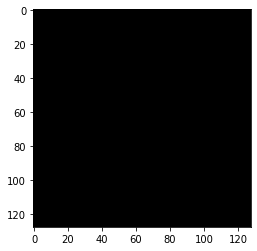

(128, 128)
8


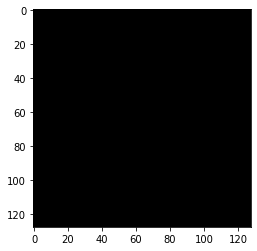

(128, 128)
9


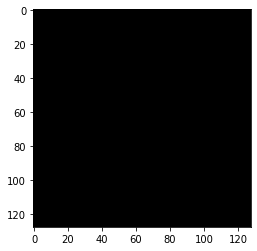

(128, 128)
10


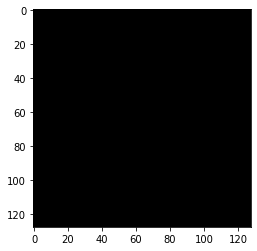

(128, 128)
11


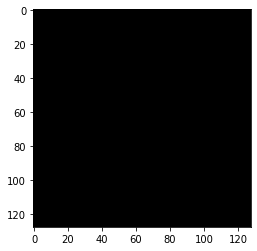

(128, 128)
12


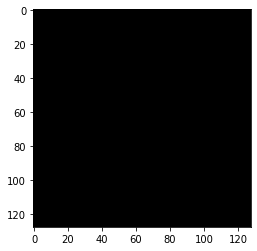

(128, 128)
13


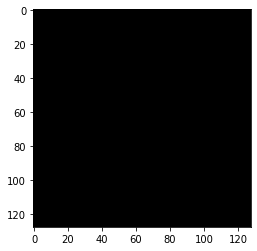

(128, 128)
14


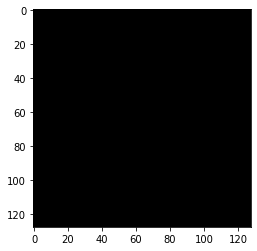

(128, 128)
15


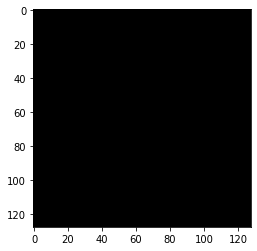

(128, 128)
16


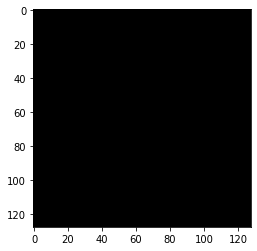

(128, 128)
17


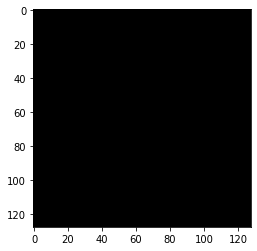

(128, 128)
18


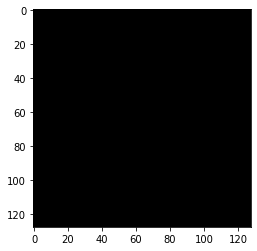

(128, 128)
19


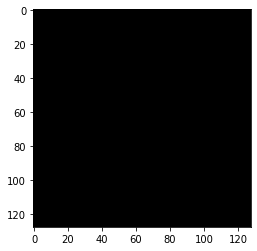

(128, 128)
20


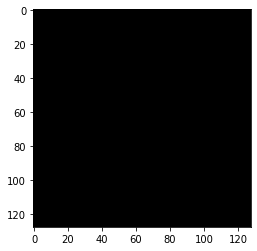

(128, 128)
21


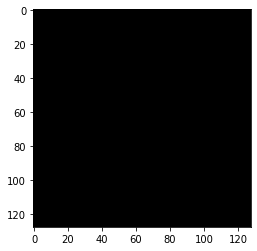

(128, 128)
22


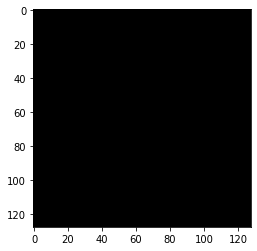

(128, 128)
23


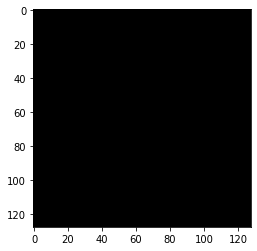

(128, 128)
24


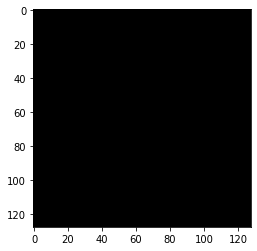

(128, 128)
25


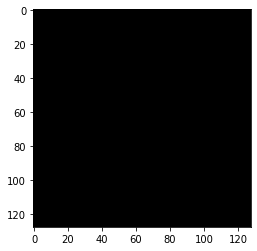

(128, 128)
26


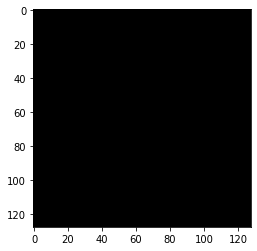

(128, 128)
27


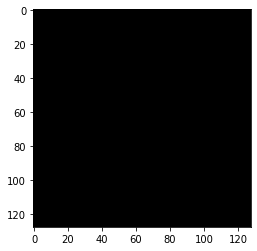

(128, 128)
28


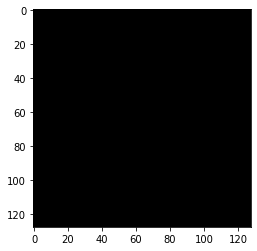

(128, 128)
29


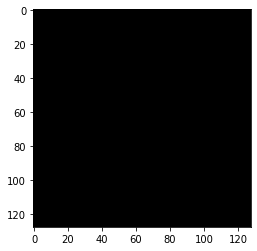

(128, 128)
30


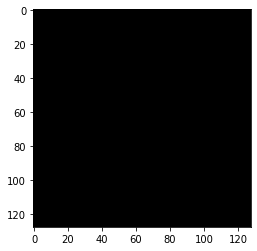

(128, 128)
31


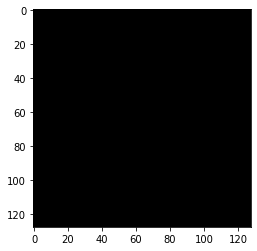

(128, 128)
32


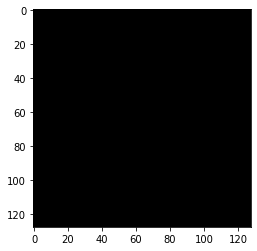

(128, 128)
33


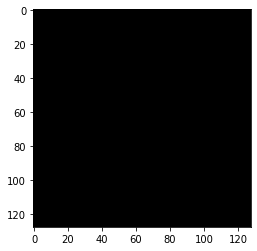

(128, 128)
34


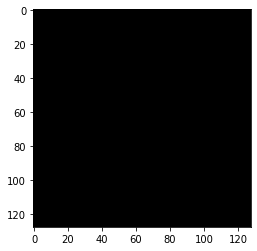

(128, 128)
35


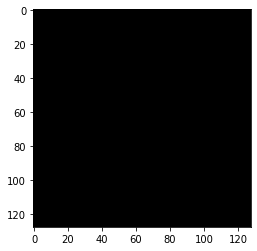

(128, 128)
36


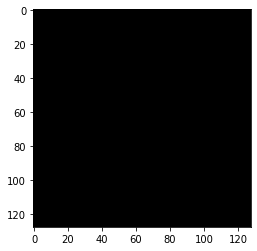

(128, 128)
37


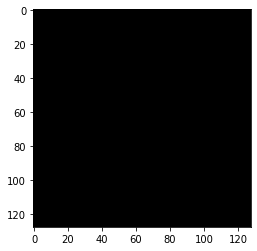

(128, 128)
38


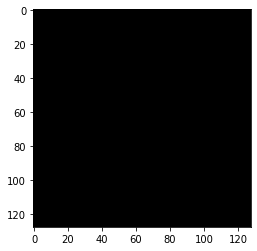

(128, 128)
39


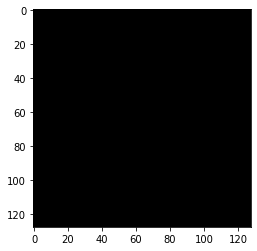

(128, 128)
40


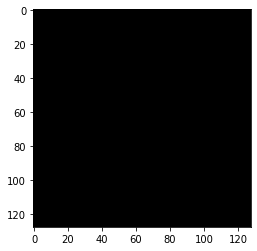

(128, 128)
41


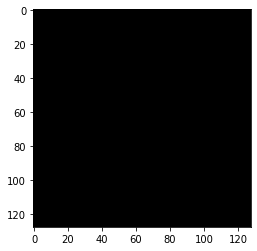

(128, 128)
42


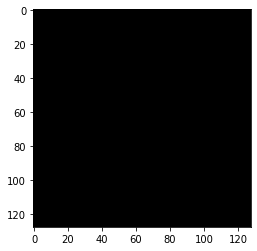

(128, 128)
43


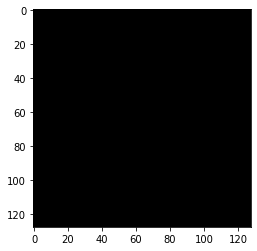

(128, 128)
44


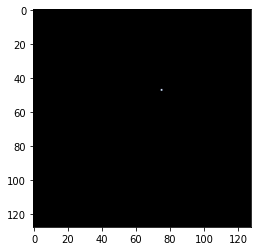

(128, 128)
45


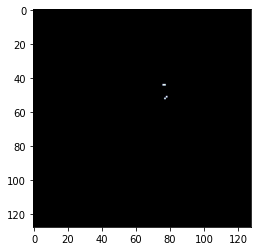

(128, 128)
46


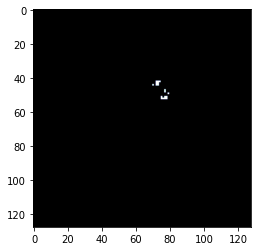

(128, 128)
47


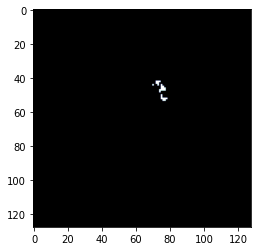

(128, 128)
48


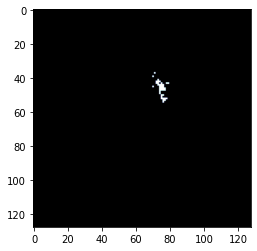

(128, 128)
49


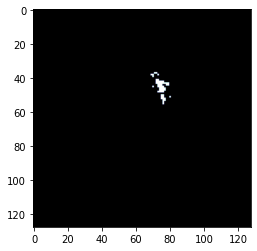

(128, 128)
50


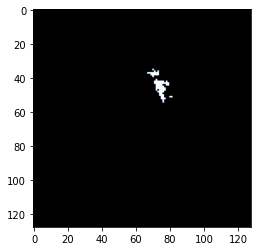

(128, 128)
51


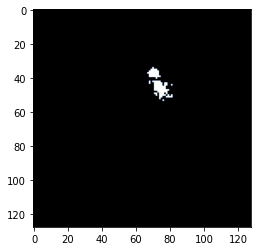

(128, 128)
52


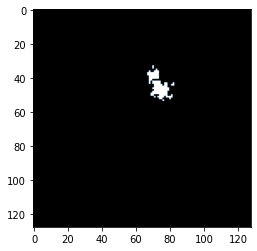

(128, 128)
53


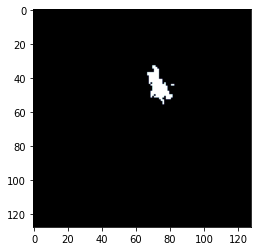

(128, 128)
54


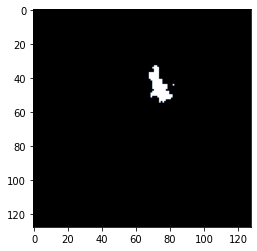

(128, 128)
55


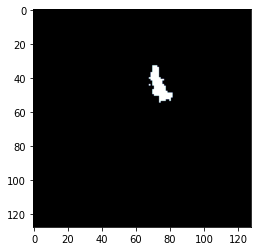

(128, 128)
56


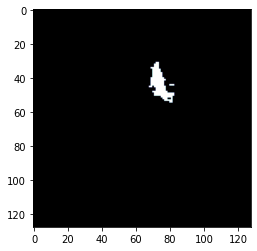

(128, 128)
57


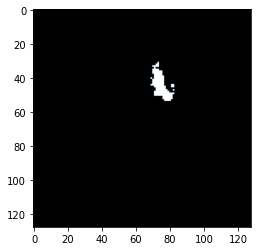

(128, 128)
58


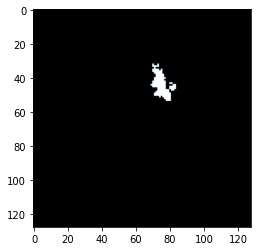

(128, 128)
59


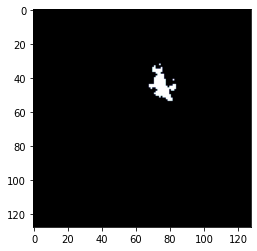

(128, 128)
60


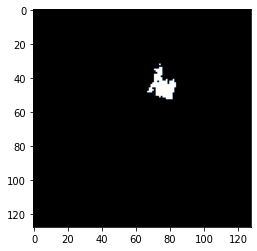

(128, 128)
61


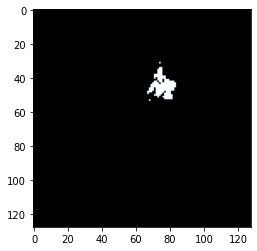

(128, 128)
62


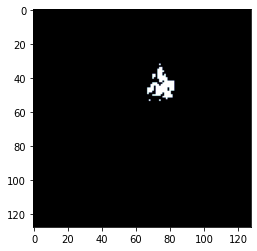

(128, 128)
63


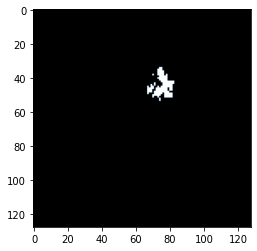

(128, 128)
64


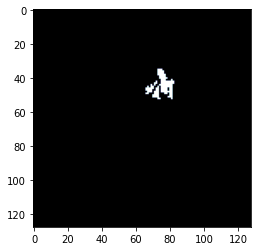

(128, 128)
65


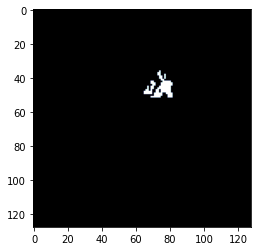

(128, 128)
66


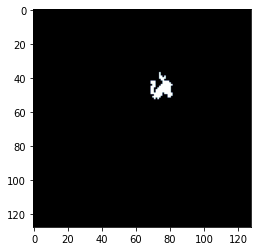

(128, 128)
67


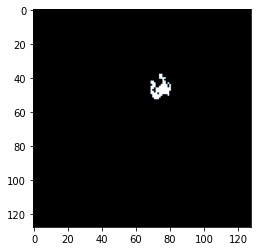

(128, 128)
68


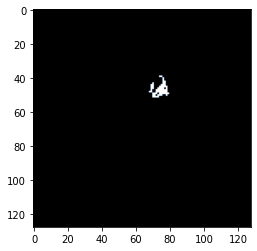

(128, 128)
69


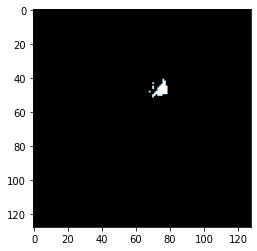

(128, 128)
70


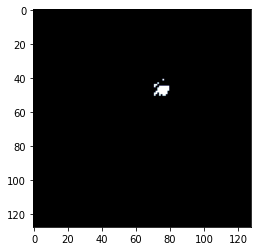

(128, 128)
71


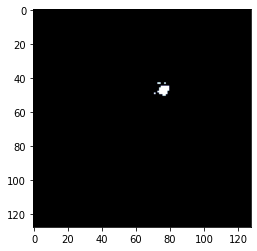

(128, 128)
72


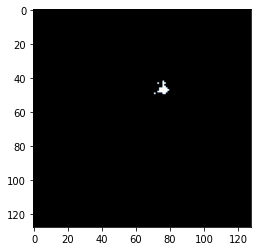

(128, 128)
73


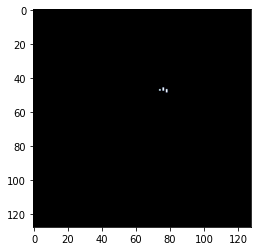

(128, 128)
74


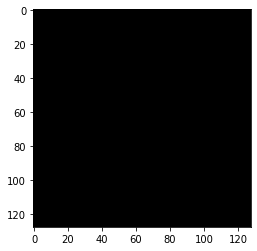

(128, 128)
75


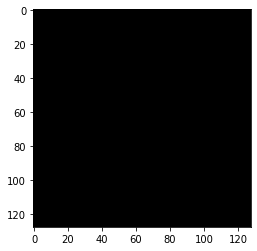

(128, 128)
76


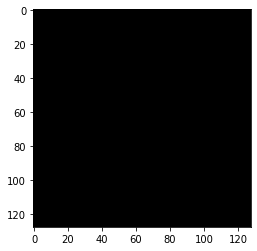

(128, 128)
77


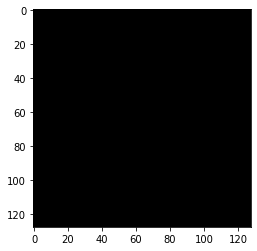

(128, 128)
78


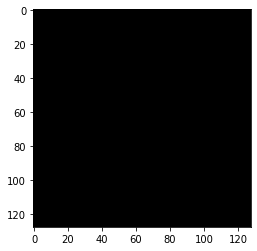

(128, 128)
79


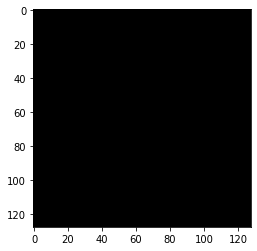

(128, 128)
80


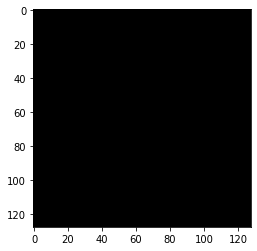

(128, 128)
81


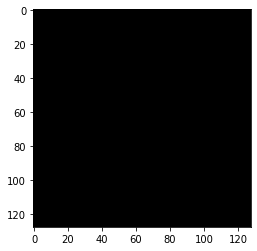

(128, 128)
82


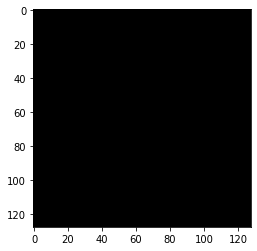

(128, 128)
83


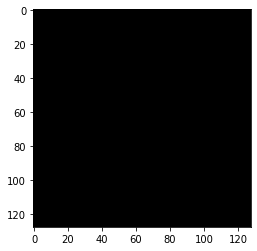

(128, 128)
84


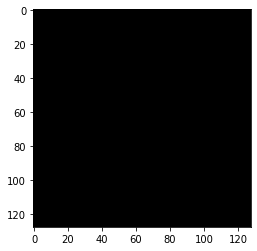

(128, 128)
85


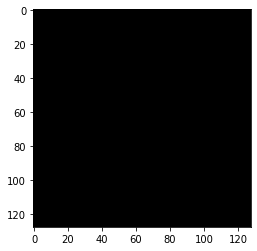

(128, 128)
86


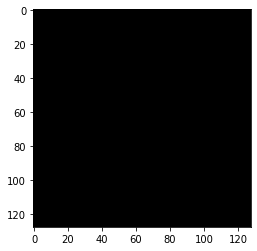

(128, 128)
87


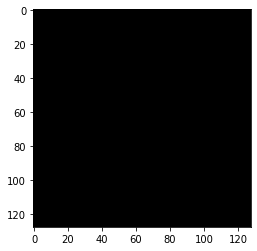

(128, 128)
88


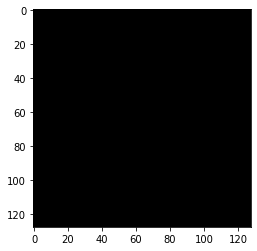

(128, 128)
89


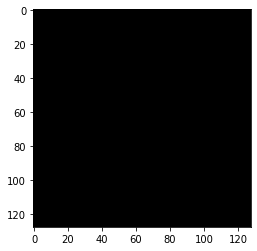

(128, 128)
90


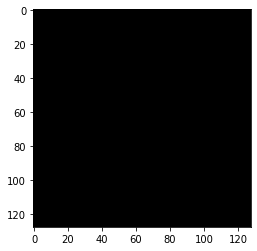

(128, 128)
91


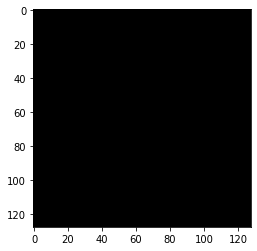

(128, 128)
92


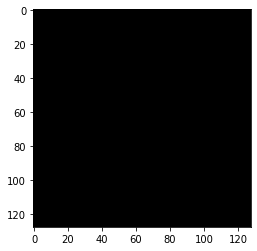

(128, 128)
93


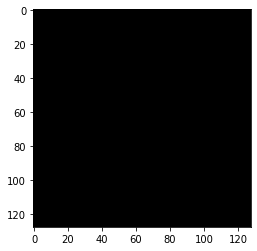

(128, 128)
94


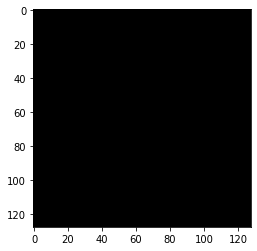

(128, 128)
95


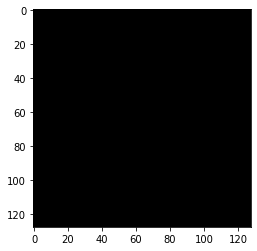

(128, 128)
96


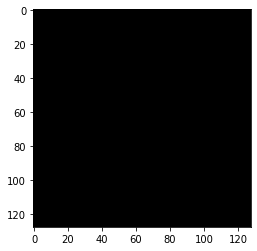

(128, 128)
97


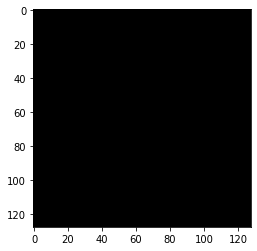

(128, 128)
98


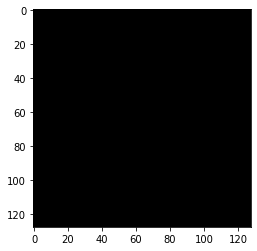

(128, 128)
99


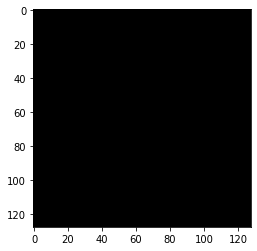

(128, 128)
100


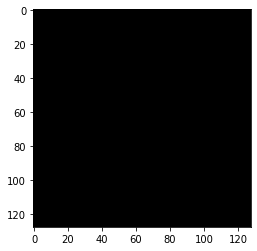

(128, 128)
101


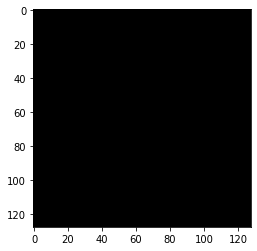

(128, 128)
102


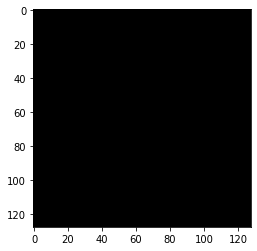

(128, 128)
103


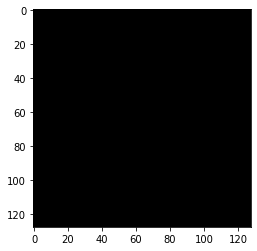

(128, 128)
104


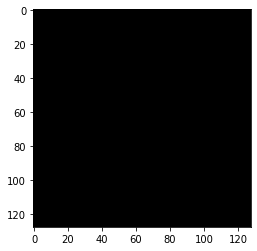

(128, 128)
105


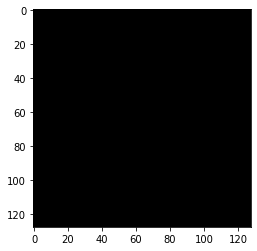

(128, 128)
106


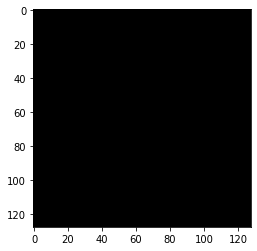

(128, 128)
107


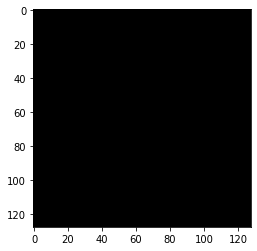

(128, 128)
108


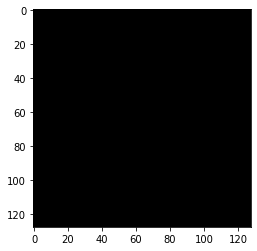

(128, 128)
109


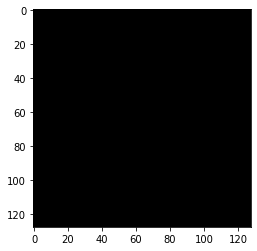

(128, 128)
110


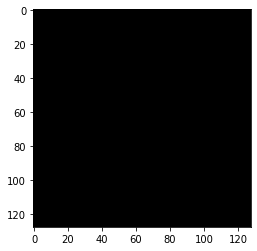

(128, 128)
111


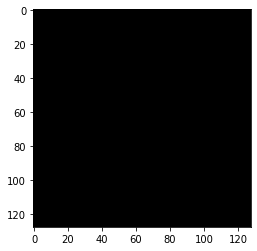

(128, 128)
112


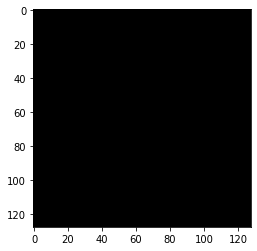

(128, 128)
113


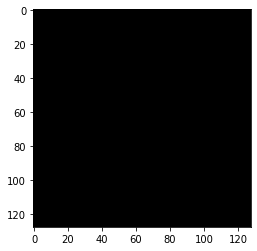

(128, 128)
114


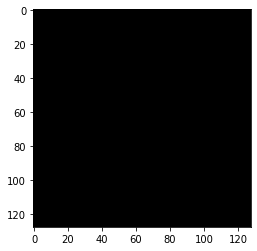

(128, 128)
115


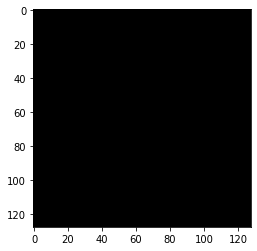

(128, 128)
116


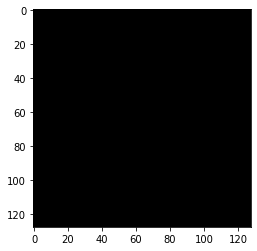

(128, 128)
117


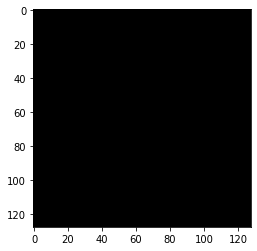

(128, 128)
118


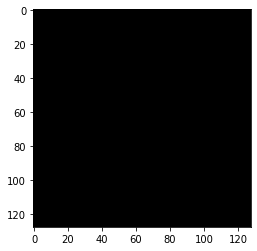

(128, 128)
119


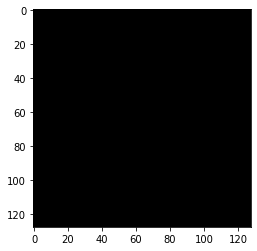

(128, 128)
120


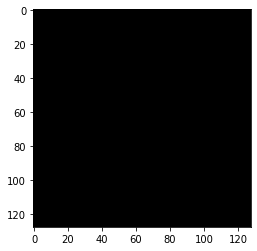

(128, 128)
121


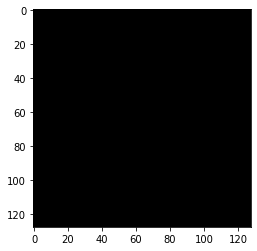

(128, 128)
122


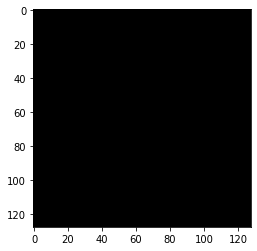

(128, 128)
123


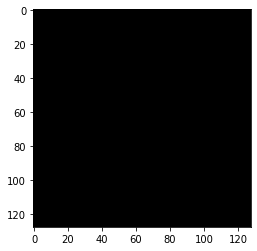

(128, 128)
124


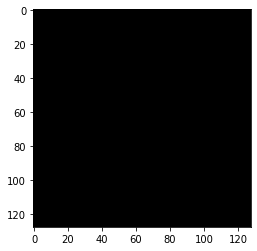

(128, 128)
125


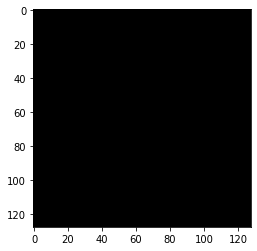

(128, 128)
126


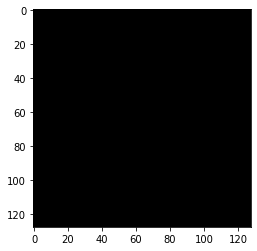

(128, 128)
127


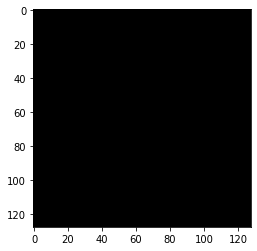

(128, 128)
128


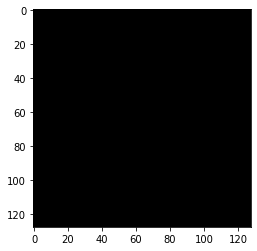

(128, 128)


In [171]:
# visualization of NECROTIC TUMOUR CORE (NCR — label 1) in an example
sample = expanded_seg_arrays[0]
print(sample.shape[1])
for i in range(sample.shape[1]):
  print(i+1)
  brain_slice = sample[0][i, :, :]
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  print(brain_slice.shape)

3
128
1 NECROTIC TUMOUR CORE (NCR — label 1)


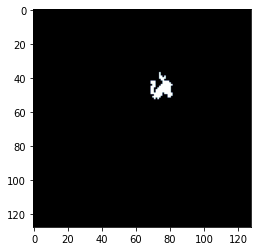

(128, 128)
2 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)


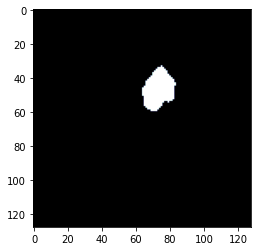

(128, 128)
3 GD-ENHANCING TUMOUR (ET — label 4)


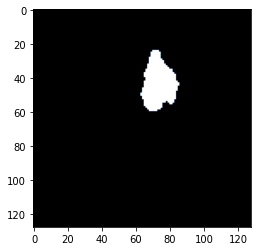

(128, 128)


In [172]:
# visualization of the subregions in one image
sample = expanded_seg_arrays[0]
print(sample.shape[0])
print(sample.shape[1])
labels = ["NECROTIC TUMOUR CORE (NCR — label 1)", "PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 2)", "GD-ENHANCING TUMOUR (ET — label 4)"]
for i in range(sample.shape[0]):
  print(str(i+1), labels[i])
  brain_slice = sample[i][65, :, :]
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  print(brain_slice.shape)

In [ ]:
print(expanded_seg_arrays)
seg_nparrays = expanded_seg_arrays

In [174]:
# make data loaders and stuff
"""
To analyze our results a split was made by patient,
such that 70% of the data (147 patients) was the training set and 30% the validation
set (63 patients). 

The BRATS 2017 high grade glioma database [6–9] containing 210 patients is split into
training set (70%) and test set (30%).

I'll go with 70:15:15
"""

"\nTo analyze our results a split was made by patient,\nsuch that 70% of the data (147 patients) was the training set and 30% the validation\nset (63 patients). \n\nThe BRATS 2017 high grade glioma database [6–9] containing 210 patients is split into\ntraining set (70%) and test set (30%).\n\nI'll go with 70:15:15\n"

In [175]:
resized_arrs.append(expanded_seg_arrays)

In [176]:
print(len(resized_arrs)) # 4 modalities + segmentation array

5


24 24 24 24 24
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
24 24 24 24 24
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

False
False


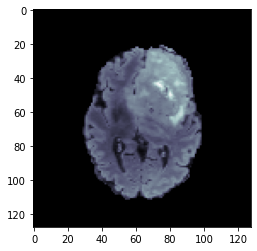

24


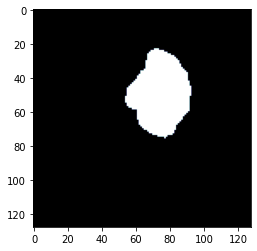

In [177]:
# lists to check the original order of these arrays
image_seg_data = list(zip(resized_arrs[0], resized_arrs[1], resized_arrs[2], resized_arrs[3], resized_arrs[4]))
# print(len(image_seg_data[0][0]))
check_flair = []
check_t1 = []
check_t1ce = []
check_t2 = []
check_segs = []
for i in image_seg_data:
  check_flair.append(i[0])
  check_t1.append(i[1])
  check_t1ce.append(i[2])
  check_t2.append(i[3])
  check_segs.append(i[4])
print(len(check_flair), len(check_t1), len(check_t1ce), len(check_t2), len(check_segs))
print(check_flair[0][100])

# lists to check the shuffled order of these arrays
import random
shuffled_flair = []
shuffled_t1 = []
shuffled_t1ce = []
shuffled_t2 = []
shuffled_segs = []
random.shuffle(image_seg_data)
for i in image_seg_data:
  shuffled_flair.append(i[0])
  shuffled_t1.append(i[1])
  shuffled_t1ce.append(i[2])
  shuffled_t2.append(i[3])
  shuffled_segs.append(i[4])
print(len(shuffled_flair), len(shuffled_t1), len(shuffled_t1ce), len(shuffled_t2), len(shuffled_segs))
print(shuffled_flair[0][100])

# check original vs shuffled
print()
# print(check_flair == shuffled_flair) -- doesn't work this way
print(np.array_equal(check_flair[0], shuffled_flair[0]))
print(np.array_equal(check_flair, shuffled_flair))

# visualize original vs shuffled
plt.imshow(shuffled_flair[3][60, :, :], cmap="bone")
plt.show()
plt.close()
print(len(shuffled_segs))
plt.imshow(shuffled_segs[3][2][60, :, :], cmap="bone")
plt.show()
plt.close()

In [178]:
len_images = len(shuffled_segs)

v_t_datasize = int(len_images*0.15) # size of validation and testing dataset
print(v_t_datasize)
training_datasize = len_images - (v_t_datasize*2) # size of training dataset
print(training_datasize)
print(v_t_datasize+v_t_datasize+training_datasize == len_images) # check if the split adds up

3
18
True


In [179]:
def make_dataset(start_idx, end_idx):
  image_dataset = [shuffled_flair[start_idx:end_idx], shuffled_t1[start_idx:end_idx], shuffled_t1ce[start_idx:end_idx], shuffled_t2[start_idx:end_idx]]
  segmentation_dataset = shuffled_segs[start_idx:end_idx]
  # return list(zip(image_dataset, segmentation_dataset))
  print(len(image_dataset),len(segmentation_dataset))
  return image_dataset, segmentation_dataset

# splitting up all the arrays
training_images, training_segmentations = make_dataset(0, training_datasize)
validation_images, validation_segmentations = make_dataset(training_datasize, training_datasize+v_t_datasize)
testing_images, testing_segmentations = make_dataset(training_datasize+v_t_datasize, len_images)

# print length and shapes to confirm the data split properly
print()
print(len(training_images), len(training_segmentations))
print(len(training_images[0]), len(training_segmentations[0]))
print()

print(len(validation_images), len(validation_segmentations))
print(len(validation_images[0]), len(validation_segmentations))
print()

print(len(testing_images), len(testing_segmentations))
print(len(testing_images[0]), len(testing_segmentations))

print()
print(len(training_images[0]))
print(len(training_images[1]))
print(len(training_images[2]))
print(len(training_images[3]))

print()
print(training_images[0][0].shape)
print(validation_images[0][0].shape)
print(testing_images[0][0].shape)

4 18
4 3
4 3

4 18
18 3

4 3
3 3

4 3
3 3

18
18
18
18

(128, 128, 128)
(128, 128, 128)
(128, 128, 128)


(128, 128, 128)


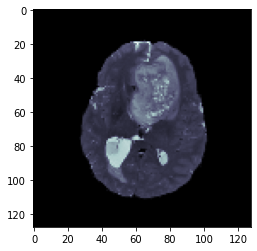

(3, 128, 128, 128)


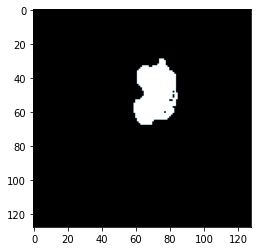

In [180]:
print(training_images[0][0].shape)
plt.imshow(training_images[3][10][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(training_segmentations[0].shape)
plt.imshow(training_segmentations[10][1][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


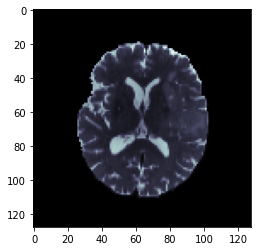

(3, 128, 128, 128)


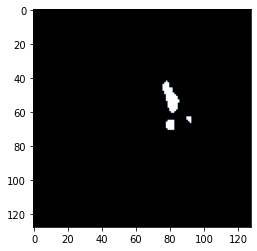

In [181]:
print(validation_images[0][0].shape)
plt.imshow(validation_images[3][2][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(validation_segmentations[0].shape)
plt.imshow(validation_segmentations[2][1][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


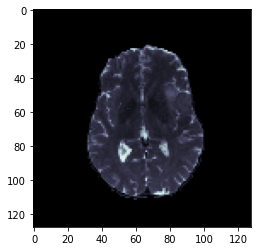

(3, 128, 128, 128)


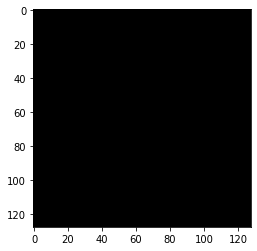

In [182]:
print(testing_images[0][0].shape)
plt.imshow(testing_images[3][1][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(testing_segmentations[0].shape)
plt.imshow(testing_segmentations[1][0][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

In [183]:
def find_mean_modality(modality_array): # find the mean of each modality (seperatly because they will be different)
  # print(len(modality_array))
  # print(modality_array[0].shape)
  total_pixels = len(modality_array)*modality_array[0].shape[0]*modality_array[0].shape[1]*modality_array[0].shape[2]
  pixels_sum = 0
  # print(total_pixels)
  for i in modality_array:
    # print(i.shape)
    pixels_sum += i.sum()
  # print(pixels_sum)
  return pixels_sum/total_pixels
  #   print(one_mean(i))
  #   total_mean1 += one_mean(i)
  #   total_mean2 += np.mean(i)
  #   # print(modality_array[image_vol])
  #   # print(modality_array[image_vol].shape)
  #   modality_array[image_vol] = apply_norm_each_volume(modality_array, image_vol)
    # print(modality_array[image_vol])

# finding mean from training images
mean_flair = find_mean_modality(training_images[0])
mean_t1 = find_mean_modality(training_images[1])
mean_t1ce = find_mean_modality(training_images[2])
mean_t2 = find_mean_modality(training_images[3])
print(mean_flair, mean_t1, mean_t1ce, mean_t2)
# all_nparrays = [flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays]

# 174.57506977187262 148.25928065511914 382.75393165482416 100.78123185369704

177.74353581004672 147.48412198490567 373.87290077739294 99.02199398146735


In [184]:
def find_std_modality(mean, modality_array): # find the std of each modality (seperatly because they will be different)
  # print(len(modality_array))
  # print(modality_array[0].shape)
  total_pixels = len(modality_array)*modality_array[0].shape[0]*modality_array[0].shape[1]*modality_array[0].shape[2]
  total_squared_sum_error = 0
  # print(total_pixels)
  for i in modality_array:
    # print(i.shape)
    total_squared_sum_error += ((i-mean)**2).sum()
  return math.sqrt(total_squared_sum_error/total_pixels)
  # print(pixels_sum)
  # return pixels_sum/total_pixels
  #   print(one_mean(i))
  #   total_mean1 += one_mean(i)
  #   total_mean2 += np.mean(i)
  #   # print(modality_array[image_vol])
  #   # print(modality_array[image_vol].shape)
  #   modality_array[image_vol] = apply_norm_each_volume(modality_array, image_vol)
    # print(modality_array[image_vol])

# 426.3266943989341 389.29038836731905 918.1716566219271 272.43761357825645

# finding std from training images
std_flair = find_std_modality(mean_flair, training_images[0])
std_t1 = find_std_modality(mean_t1, training_images[1])
std_t1ce = find_std_modality(mean_t1ce, training_images[2])
std_t2 = find_std_modality(mean_t2, training_images[3])

print(std_flair, std_t1, std_t1ce, std_t2)

# 428.9073378821583 369.30588546871707 925.0379658455281 268.7646785680857

439.2259630049873 377.5904730497743 914.4160791447514 265.1686439934261


In [185]:
def apply_norm_each_modality(mean, std, modality_array):
  # print(len(modality_array))
  for image_vol in range(len(modality_array)):
    # print(modality_array[image_vol])
    # print(modality_array[image_vol].shape)
    modality_array[image_vol] = apply_norm_each_volume(mean, std, modality_array, image_vol)
    # print(modality_array[image_vol])
  return modality_array

In [186]:
def apply_norm_each_volume(mean, std, modality_array, img_vol): # apply normalization to each image volume in each modality
  modality_array[img_vol] = (modality_array[img_vol]-mean)/std
  return modality_array[img_vol]

In [187]:
print(len(training_images))
print(len(validation_images))
print(len(testing_images))

print(len(training_images[0]))
print(len(validation_images[0]))
print(len(testing_images[0]))

4
4
4
18
3
3


In [188]:
# print(training_images[0][0])
# training_images[0] = apply_norm_each_modality(mean_flair, std_flair, training_images[0])
# print(training_images[0][0])

In [ ]:
# applying normalization to all the modalities in the training
normalized_flair_trnparrays = apply_norm_each_modality(mean_flair, std_flair, training_images[0])
print(normalized_flair_trnparrays[0][0])
print()
print()

normalized_t1_trnparrays = apply_norm_each_modality(mean_t1, std_t1, training_images[1])
print(normalized_t1_trnparrays[0][0])
print()
print()

normalized_t1ce_trnparrays = apply_norm_each_modality(mean_t1ce, std_t1ce, training_images[2])
print(normalized_t1ce_trnparrays[0][0])
print()
print()

normalized_t2_trnparrays = apply_norm_each_modality(mean_t2, std_t2, training_images[3])
print(normalized_t2_trnparrays[0][0])
print()

tr_normalized_arrays= [normalized_flair_trnparrays, normalized_t1_trnparrays, normalized_t1ce_trnparrays, normalized_t2_trnparrays]

In [ ]:
# applying normalization to all the modalities in the validation
normalized_flair_vnparrays = apply_norm_each_modality(mean_flair, std_flair, validation_images[0])
print(normalized_flair_vnparrays[0][0])
print()
print()

normalized_t1_vnparrays = apply_norm_each_modality(mean_t1, std_t1, validation_images[1])
print(normalized_t1_vnparrays[0][0])
print()
print()

normalized_t1ce_vnparrays = apply_norm_each_modality(mean_t1ce, std_t1ce, validation_images[2])
print(normalized_t1ce_vnparrays[0][0])
print()
print()

normalized_t2_vnparrays = apply_norm_each_modality(mean_t2, std_t2, validation_images[3])
print(normalized_t2_vnparrays[0][0])
print()

v_normalized_arrays= [normalized_flair_vnparrays, normalized_t1_vnparrays, normalized_t1ce_vnparrays, normalized_t2_vnparrays]

In [ ]:
# applying normalization to all the modalities in the testing
normalized_flair_tenparrays = apply_norm_each_modality(mean_flair, std_flair, testing_images[0])
print(normalized_flair_tenparrays[0][0])
print()
print()

normalized_t1_tenparrays = apply_norm_each_modality(mean_t1, std_t1, testing_images[1])
print(normalized_t1_tenparrays[0][0])
print()
print()

normalized_t1ce_tenparrays = apply_norm_each_modality(mean_t1ce, std_t1ce, testing_images[2])
print(normalized_t1ce_tenparrays[0][0])
print()
print()

normalized_t2_tenparrays = apply_norm_each_modality(mean_t2, std_t2, testing_images[3])
print(normalized_t2_tenparrays[0][0])
print()

te_normalized_arrays= [normalized_flair_tenparrays, normalized_t1_tenparrays, normalized_t1ce_tenparrays, normalized_t2_tenparrays]

(128, 128, 128)


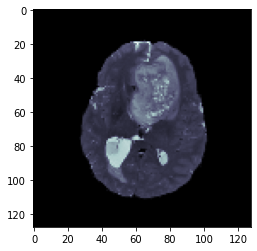

(3, 128, 128, 128)


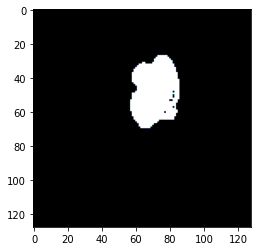

In [192]:
# checking that normalization didn't make any drastic changes
print(tr_normalized_arrays[0][0].shape)
plt.imshow(tr_normalized_arrays[3][10][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(training_segmentations[0].shape)
plt.imshow(training_segmentations[10][2][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


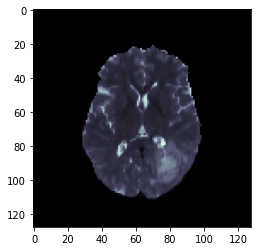

(3, 128, 128, 128)


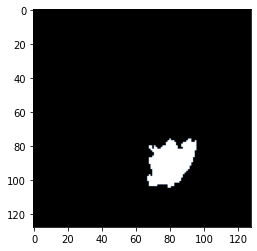

In [193]:
# checking that normalization didn't make any drastic changes
print(v_normalized_arrays[0][0].shape)
plt.imshow(v_normalized_arrays[3][1][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(validation_segmentations[0].shape)
plt.imshow(validation_segmentations[1][2][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

(128, 128, 128)


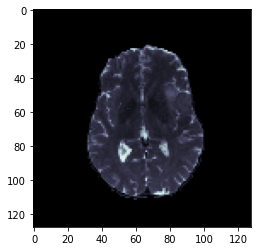

(3, 128, 128, 128)


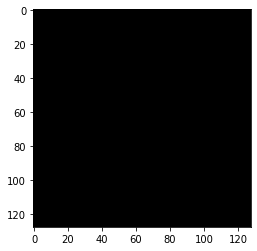

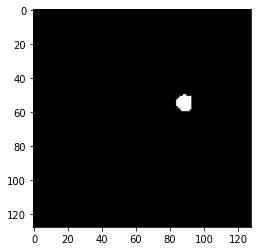

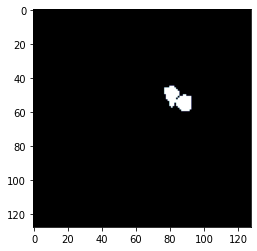

In [194]:
# checking that normalization didn't make any drastic changes
print(te_normalized_arrays[0][0].shape)
plt.imshow(te_normalized_arrays[3][1][60, :, :], cmap="bone") # [modality][image number][128x128x128]
plt.show()
plt.close()

print(testing_segmentations[0].shape)
plt.imshow(testing_segmentations[1][0][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()
plt.imshow(testing_segmentations[1][1][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()
plt.imshow(testing_segmentations[1][2][60, :, :], cmap="bone") # [image number][channels][128x128x128]
plt.show()
plt.close()

In [195]:
"""
we will need transforms.Compose if we need data augmentation,but since the segmentations were having problems
with converting to tensor and float32, I just used .FloatTensor and it works the same
"""

'\nwe will need transforms.Compose if we need data augmentation,but since the segmentations were having problems\nwith converting to tensor and float32, I just used .FloatTensor and it works the same\n'

In [196]:
# making the images float32 datatype
def images_transform(tvt_image_dataset):
  print(len(tvt_image_dataset))
  for modal in range(len(tvt_image_dataset)):
    for volumes in range(len(tvt_image_dataset[modal])): 
      volume = tvt_image_dataset[modal][volumes]
      # print(tvt_image_dataset[modal][volumes].shape)
      volume = torch.FloatTensor(volume)
      tvt_image_dataset[modal][volumes] = volume
  return tvt_image_dataset

In [197]:
# making the segmentations float32 datatype
def segmentations_transform(tvt_seg_dataset):
  print(len(tvt_seg_dataset))
  for i in range(len(tvt_seg_dataset)):
    volume = tvt_seg_dataset[i] # 128x128x128
    # print(volume.shape)
    volume = torch.FloatTensor(volume)
    # print(volume.shape)
    # print(volume.dtype)
    tvt_seg_dataset[i] = volume
  return tvt_seg_dataset

In [198]:
training_images = images_transform(tr_normalized_arrays) # transforming the training images

4


In [199]:
training_segmentations = segmentations_transform(training_segmentations) # transforming the training segmentations

18


4
18
18
3
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
torch.float32
torch.float32


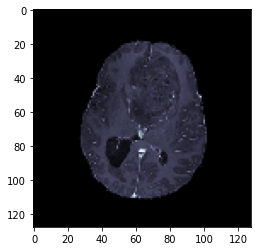

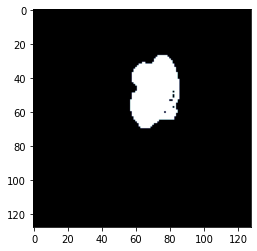

In [200]:
print(len(training_images))
print(len(training_images[0])) # modalities

print(len(training_segmentations))
print(len(training_segmentations[0])) # channels

print(training_images[0][0].shape)
print(training_segmentations[0][0].shape)

imgg = training_images[1][1]
segg = training_segmentations[1][0]

# check to see the type and shape (ensures that this is the same as the previous code with transforms.Compose)
print(type(imgg))
print(type(segg))
print(imgg.shape)
print(segg.shape)
print(imgg.dtype)
print(segg.dtype)

sliceimg = imgg[60, :, :]
sliceseg = segg[60, :, :]

# testing 2 slices
plt.imshow(training_images[2][10][60,:,:], cmap="bone")
plt.show()
plt.close()
plt.imshow(training_segmentations[10][2][60,:,:], cmap="bone")
plt.show()
plt.close()

In [201]:
validation_images = images_transform(v_normalized_arrays) # transforming the validation images

4


In [202]:
validation_segmentations = segmentations_transform(validation_segmentations) # transforming the validation segmentations

3


4
3
3
3
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
torch.float32
torch.float32


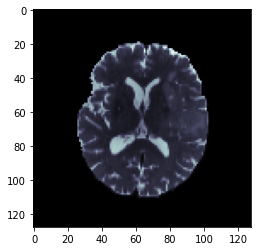

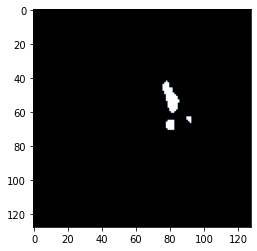

In [203]:
print(len(validation_images))
print(len(validation_images[0])) # modalities

print(len(validation_segmentations))
print(len(validation_segmentations[0])) # channels

imgg = validation_images[1][1]
segg = validation_segmentations[1][0]

# check to see the type and shape (ensures that this is the same as the previous code with transforms.Compose)
print(type(imgg))
print(type(segg))
print(imgg.shape)
print(segg.shape)
print(imgg.dtype)
print(segg.dtype)

sliceimg = imgg[60, :, :]
sliceseg = segg[60, :, :]

# visualization of 2 transformed slices
plt.imshow(validation_images[3][2][60,:,:], cmap="bone")
plt.show()
plt.close()
plt.imshow(validation_segmentations[2][1][60,:,:], cmap="bone")
plt.show()
plt.close()

In [204]:
testing_images = images_transform(te_normalized_arrays) # transforming the testing images

4


In [205]:
testing_segmentations = segmentations_transform(testing_segmentations) # transforming the training segmentations

3


4
3
3
3
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([128, 128, 128])
torch.Size([128, 128, 128])
torch.float32
torch.float32


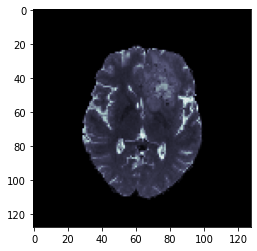

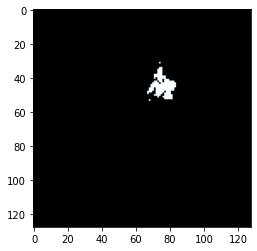

In [206]:
print(len(testing_images))
print(len(testing_segmentations[0])) # modalities

print(len(validation_segmentations))
print(len(testing_segmentations[0])) # channels

imgg = testing_images[1][1]
segg = testing_segmentations[1][0]

# check to see the type and shape (ensures that this is the same as the previous code with transforms.Compose)
print(type(imgg))
print(type(segg))
print(imgg.shape)
print(segg.shape)
print(imgg.dtype)
print(segg.dtype)

sliceimg = imgg[60, :, :]
sliceseg = segg[60, :, :]

# visualization of 2 transformed slices
plt.imshow(testing_images[3][2][60,:,:], cmap="bone")
plt.show()
plt.close()
plt.imshow(testing_segmentations[2][0][60,:,:], cmap="bone")
plt.show()
plt.close()

In [207]:
# unsqueezing the first dimension of the image volumes (will allow for concatentation of modalities later)
def expand_images(transformed_ten):
  print(len(transformed_ten))
  for i in range(len(transformed_ten)):
    volumes = transformed_ten[i]
    for image_volume in range(len(volumes)):
      # print(volumes[image_volume].shape)
      transformed_ten[i][image_volume] = torch.unsqueeze(volumes[image_volume], axis=0)
      # print(volumes[image_volume].shape)
  return transformed_ten

In [208]:
expanded_trimages = expand_images(training_images)
expanded_vimages = expand_images(validation_images)
expanded_teimages = expand_images(testing_images)

4
4
4


In [209]:
# test expansion of image volumes
print(expanded_trimages[0][0].shape)
print(expanded_vimages[0][0].shape)
print(expanded_teimages[0][0].shape)

torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])
torch.Size([1, 128, 128, 128])


In [210]:
# unsqueezing the first dimension of the segmentation volumes (will just keep shape consistent with image volumes)
def expand_segmentations(transformed_ten):
  print(len(transformed_ten))
  for seg_volume in range(len(transformed_ten)):
    # print(transformed_ten[seg_volume].shape)
    transformed_ten[seg_volume] = torch.unsqueeze(transformed_ten[seg_volume], axis=0)
    # print(transformed_ten[seg_volume].shape)
  return transformed_ten

In [211]:
trseg_data = expand_segmentations(training_segmentations)
vseg_data = expand_segmentations(validation_segmentations)
teseg_data = expand_segmentations(testing_segmentations)

18
3
3


In [212]:
# test expansion of segmentation volumes
print(trseg_data[0].shape)
print(vseg_data[0].shape)
print(teseg_data[0].shape)

torch.Size([1, 3, 128, 128, 128])
torch.Size([1, 3, 128, 128, 128])
torch.Size([1, 3, 128, 128, 128])


In [213]:
def concat_modalities(flair,t1,t1ce,t2):
  concat_tensors = []
  for i in range(len(flair)):
    new = torch.cat((flair[i],t1[i],t1ce[i],t2[i]), axis=0)
    # print(new.shape)
    # print(new[0].shape)
    concat_tensors.append(new)
  # print(len(concat_arrays))
  return concat_tensors
  
# ex_concat = concat_modalities(flair_nparrays, t1_nparrays, t1ce_nparrays, t2_nparrays)
# print(len(ex_concat))
# print(ex_concat[0].shape)

In [214]:
# concatenate image volumes by modality in training, validation, and testing data
trimage_data = concat_modalities(expanded_trimages[0], expanded_trimages[1], expanded_trimages[2], expanded_trimages[3])
vimage_data = concat_modalities(expanded_vimages[0], expanded_vimages[1], expanded_vimages[2], expanded_vimages[3])
teimage_data = concat_modalities(expanded_teimages[0], expanded_teimages[1], expanded_teimages[2], expanded_teimages[3])

print(len(trimage_data))
print(trimage_data[0].shape)
print(len(vimage_data))
print(vimage_data[0].shape)
print(len(teimage_data))
print(teimage_data[0].shape)

18
torch.Size([4, 128, 128, 128])
3
torch.Size([4, 128, 128, 128])
3
torch.Size([4, 128, 128, 128])


In [ ]:
# visualize an image volume
testing_img = trimage_data[12]
print(testing_img.shape)
for i in range(testing_img.shape[2]):
  print(i+1)
  brain_slice = testing_img[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()

In [216]:
# data augmentation - i will not do for now because computations are alr heavy - otherwise i would probably add some rotaions and flipping

In [217]:
# zipping the training images and training segmentations
training_data = list(zip(trimage_data, trseg_data))
# zipping the validation images and validation segmentations
validation_data = list(zip(vimage_data, vseg_data))
# zipping the testing images and testing segmentations
testing_data = list(zip(teimage_data, teseg_data))

In [218]:
# make the trainloader, validationloader, and testloader (to iterate for training, validation, and testing steps)
from torch import utils

trainloader = torch.utils.data.DataLoader(training_data, batch_size=2, shuffle = True) # batch size should be 10
# ^batch size is 1 for now because we only have 20 images in total- only 14 for training

validationloader = torch.utils.data.DataLoader(validation_data, batch_size=2, shuffle = True) # batch size should be 10

testloader = torch.utils.data.DataLoader(testing_data, batch_size=2, shuffle = True) 

In [ ]:
# visualizing the training images and training segmentations in trainloader to ensure it iterates properly
trimage, trseg = next(iter(trainloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

trimage = trimage[0].squeeze()
trseg = trseg[0].squeeze()

for i in range(trimage.shape[2]):
  print(i+1)
  print(trimage.shape)
  print(trseg.shape)
  brain_slice = trimage[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  brain_slice_sg = trseg[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  plt.imshow(brain_slice_sg, cmap="bone")
  plt.show()
  plt.close()

In [ ]:
# visualizing the validation images and validation segmentations in validationloader to ensure it iterates properly
vimage, vseg = next(iter(validationloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

vimage = vimage[0].squeeze()
vseg = vseg[0].squeeze()

for i in range(vimage.shape[2]):
  print(i+1)
  print(vimage.shape)
  brain_slice = vimage[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  brain_slice_sg = vseg[1][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  plt.imshow(brain_slice_sg, cmap="bone")
  plt.show()
  plt.close()

In [ ]:
# visualizing the testing images and testing segmentations in testloader to ensure it iterates properly
teimage, teseg = next(iter(testloader)) # every time you run this, it gives you new image and new label (since it also shuffles)

teimage = teimage[0].squeeze()
teseg = teseg[0].squeeze()

print(teimage.shape)
print(teseg.shape)


for i in range(teimage.shape[2]):
  print(i+1)
  print(teimage.shape)
  brain_slice = teimage[0][i, :, :] # first coordinate goes through slices from top to bottom - last 2 are basically the X and Y (|__)
  brain_slice_sg = teseg[2][i, :, :] # 3nd channel
  plt.imshow(brain_slice, cmap="bone")
  plt.show()
  plt.close()
  plt.imshow(brain_slice_sg, cmap="bone")
  plt.show()
  plt.close()

SLICE OF BRAIN


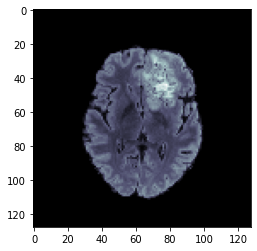

1 NECROTIC TUMOUR CORE (NCR — label 1)


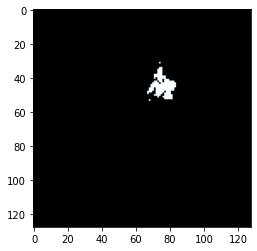

2 GD-ENHANCING TUMOUR (ET — label 2)


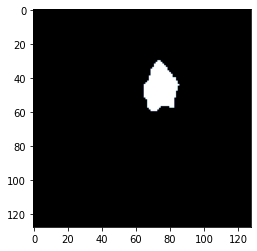

3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)


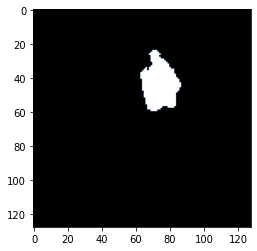

In [222]:
# visulizing one slice of an image
brain_slice = teimage[0][60, :, :]

# visualizing each channel/binary mask in the ground truth (looking at every subregion)
brain_slice_sg1 = teseg[0][60, :, :]
brain_slice_sg2 = teseg[1][60, :, :]
brain_slice_sg3 = teseg[2][60, :, :]

print("SLICE OF BRAIN")
plt.imshow(brain_slice, cmap="bone")
plt.show()
plt.close()

print("1 NECROTIC TUMOUR CORE (NCR — label 1)")
plt.imshow(brain_slice_sg1, cmap="bone")
plt.show()
plt.close()

print("2 GD-ENHANCING TUMOUR (ET — label 2)")
plt.imshow(brain_slice_sg2, cmap="bone")
plt.show()
plt.close()

print("3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)")
plt.imshow(brain_slice_sg3, cmap="bone")
plt.show()
plt.close()

#**3D Segmentation Model Implementations**
#### Model 1: Fully Convolutional Network (FCN)
*   https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/FCN_multiclass_masks.ipynb

#### Model 2: nnU-Net
*   https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/nnU_Net.ipynb

#### Model 3: Residual 3D U-Net
*   https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/Residual_3D_U_Net_multiclass_masks.ipynb

#### Model 4: HDC-Net
*   https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/HDC_Net_multiclass_masks.ipynb

#### Model 1: SA-Net
*   https://github.com/shizacharania/IAMLAB-BraTS-Challenge/blob/main/SA_Net.ipynb

In [223]:
import torch
import torch.nn as nn
import scipy.ndimage

In [224]:
class HDC_Block(nn.Module):
  def __init__(self, channels):
    super().__init__()
    # my assumption was that if you wanted a convolution with 3x3x1, you couldn't have it be 3d and specify the kernel size like that
    # however, looking at the code implementation, you can do that
    self.one_one_one1 = nn.Conv3d(channels, channels, kernel_size=1, stride=1)
    self.three_three_one = nn.Conv3d(8, 8, kernel_size=(3,3,1), padding=(1,1,0))
    self.one_three_three = nn.Conv3d(channels, channels, kernel_size=(1,3,3), padding=(0,1,1))
  def forward(self, x):
    x1 = self.one_one_one1(x)
    print(x1.shape)

    # [2, 32, 64, 64, 64]

    print("channel groups")
    # split into 4
    channel_group1 = x1[:, 0:8, :, :, :] # one modality
    print(channel_group1.shape)

    channel_group2 = x1[:, 8:16, :, :, :]
    print(channel_group2.shape)

    channel_group3 = x1[:, 16:24, :, :, :]
    print(channel_group3.shape)

    channel_group4 = x1[:, 24:32, :, :, :]
    print(channel_group4.shape)

    x2 = self.three_three_one(channel_group2)
    print(x2.shape)
    x3 = self.three_three_one(channel_group3+x2)
    print(x3.shape)
    x4 = self.three_three_one(channel_group4+x3)
    print(x4.shape)

    end = torch.cat([channel_group1, x2, x3, x4], dim=1)
    print(end.shape)

    x5 = self.one_one_one1(end)
    print(x5.shape)

    out = self.one_three_three(x5)
    print(out.shape)
    return out

In [225]:
x = torch.rand(size=(2, 32, 64, 64, 64), dtype=torch.float32)
print(x.shape)

model = HDC_Block(32)
print(model)
print()

out = model(x)

torch.Size([2, 32, 64, 64, 64])
HDC_Block(
  (one_one_one1): Conv3d(32, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (three_three_one): Conv3d(8, 8, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
  (one_three_three): Conv3d(32, 32, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
)

torch.Size([2, 32, 64, 64, 64])
channel groups
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])


In [226]:
class HDC_Net(nn.Module):
  def __init__(self, x):
    super().__init__()
    # self.pds = torch.nn.functional.interpolate(x)
    self.conv1 = nn.Conv3d(in_channels=4, out_channels=32, kernel_size=3, padding=1, stride=1)
    self.downsample = nn.Conv3d(32, 32, kernel_size=2, stride=2)
    self.HDC = HDC_Block(32)
    self.upsample = nn.ConvTranspose3d(32, 32, kernel_size=2, stride=2)
    self.upinterpolate = nn.Upsample(scale_factor=2, mode='trilinear')
    self.conv2 = nn.Conv3d(in_channels=32, out_channels=3, kernel_size=1, stride=1)
    self.softmax = nn.Softmax(dim=1)
  def forward(self, x):
    print(x.shape)
    nimages, channels, width, height, depth = x.shape
    print(nimages, channels, width, height, depth)
    print(x.type)
    # x1 = torch.tensor(scipy.ndimage.zoom(x, [1, 8.0, 0.5, 0.5, 0.5])) # using this function took about 2 minutes and for many images, it's not reasonable
    x1 = torch.nn.functional.interpolate(x, scale_factor=[0.5, 0.5, 0.5]) # PDS - interpolate only looks at dim 2,3,4... (doesn't regard for channel and number of images)
    # instead, I used torch.nn.functional.interpolate to interpolate the spatial dimensions, but for the channels I used a 1x1x1 conv
    # because they did want to avoid using 3x3x3 conv and it will work same
    print(x1.shape)
    x1 = self.conv1(x1)
    print(x1.shape)

    x2 = self.HDC(x1)
    print(x2.shape)
    print()
    x3 = self.downsample(x2)
    print(x3.shape)

    x4 = self.HDC(x3)
    print(x4.shape)
    print()
    x5 = self.downsample(x4)
    print(x5.shape)

    x6 = self.HDC(x5)
    print(x6.shape)
    print()
    x7 = self.downsample(x6)
    print(x7.shape)

    x8 = self.HDC(x7)
    print(x8.shape)
    print()

    print("decoder time")

    x9 = self.upsample(x8)
    print(x9.shape)
    x10 = torch.add(x9, x6)
    print(x10.shape)
    x11 = self.HDC(x10)
    print(x11.shape)

    x12 = self.upsample(x11)
    print(x12.shape)
    x13 = torch.add(x12, x4)
    print(x13.shape)
    x14 = self.HDC(x13)
    print(x14.shape)

    x15 = self.upsample(x14)
    print(x15.shape)
    x16 = torch.add(x15, x2)
    print(x16.shape)
    x17 = self.HDC(x16)
    print(x17.shape)

    print("\nupsampling\n") # by this they meant interpolation

    x18 = self.upinterpolate(x17)
    print(x18.shape)

    x19 = self.conv2(x18)
    print(x19.shape)

    out = self.softmax(x19)
    print(out.shape)

    return x19, out

In [227]:
x = torch.rand(size=(2, 4, 128, 128, 128), dtype=torch.float32)
print(x.shape)

model = HDC_Net(x)
print(model)
print()

torch.Size([2, 4, 128, 128, 128])
HDC_Net(
  (conv1): Conv3d(4, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
  (downsample): Conv3d(32, 32, kernel_size=(2, 2, 2), stride=(2, 2, 2))
  (HDC): HDC_Block(
    (one_one_one1): Conv3d(32, 32, kernel_size=(1, 1, 1), stride=(1, 1, 1))
    (three_three_one): Conv3d(8, 8, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
    (one_three_three): Conv3d(32, 32, kernel_size=(1, 3, 3), stride=(1, 1, 1), padding=(0, 1, 1))
  )
  (upsample): ConvTranspose3d(32, 32, kernel_size=(2, 2, 2), stride=(2, 2, 2))
  (upinterpolate): Upsample(scale_factor=2.0, mode=trilinear)
  (conv2): Conv3d(32, 3, kernel_size=(1, 1, 1), stride=(1, 1, 1))
  (softmax): Softmax(dim=1)
)



In [228]:
"""
Training + Validation:
multi-class soft Dice function as the loss function

Testing:
mean accuracy
dice coefficient
hausdorff implementation
"""

'\nTraining + Validation:\nmulti-class soft Dice function as the loss function\n\nTesting:\nmean accuracy\ndice coefficient\nhausdorff implementation\n'

In [229]:
# chose to make this a class because when you call dice loss in criterion, you don't have anything to input, but when u run the prediction through inside the training, then you have params
# also because most sources I saw used a class
class DiceLoss(nn.Module):
  def __init__(self):
    super().__init__()
    self.smooth = 1
  def forward(self, true, pred):
    # flatten to easily do it pixel by pixel
    true = true.view(-1)
    pred = pred.view(-1)
    numerator = 2*(true*pred).sum()
    denominator = true.sum() + pred.sum()
    dice_loss = 1 - (numerator + self.smooth) / (denominator + self.smooth)
    return dice_loss

In [230]:
import torch.optim
import datetime

In [231]:
# epochs
epochs = 2 # should be 800
# loss
criterion = DiceLoss()
# optimizer
optimizer = torch.optim.Adam(params=model.parameters(), lr=10**-3, weight_decay=10**-5)

In [ ]:
training_losses = []
validation_losses = []

for i in range(epochs): # for every epoch
  start_epoch = datetime.datetime.now() # start the timer in datetime module
  training_loss = 0 # training loss for this epoch
  validation_loss = 0 # validation loss for this epoch
  print("training time")
  for images, segs in trainloader: # getting one batch from trainloader
    optimizer.zero_grad() # turn on gradients (used for forward and backprop)
    print(len(images), len(segs))
    print(images.shape)
    print(segs.shape)
    # need to squeeze the 1 in first dimension
    images = images.squeeze().clone().detach().requires_grad_(True)
    # segs = segs.long() - no
    segs = segs.squeeze().clone().detach().requires_grad_(True)
    print(images.shape)
    print(segs.shape)
    outputs, softmax_outputs = model(images) # put images through model
    print(outputs.shape)
    print(softmax_outputs.shape)

    # arg_outputs = outputs.argmax(dim=1)
    # print(arg_outputs.shape)
    # print(arg_outputs)
    # print(segs.shape)
    print()
    loss = criterion(softmax_outputs.float(), segs)
    print(loss) # loss with random tensors will be really high because none of the tensors are related to each other
    
    loss.backward() # back propagation
    training_loss += loss.item() # add loss to training loss
    print()

  # print("validation time")
  for images, segs in validationloader: # getting one batch from validationloader
    optimizer.zero_grad() # turn on gradients (used for forward and backprop)
    print(len(images), len(segs))
    print(images.shape)
    print(segs.shape)
    # need to squeeze the 1 in first dimension
    # images = images.squeeze().clone().detach().requires_grad_(True)
    # segs = segs.long() - no
    # segs = segs.squeeze().clone().detach().requires_grad_(True)
    print(images.shape)
    print(segs.shape)
    outputs, softmax_outputs = model(images) # put images through model
    print(outputs.shape)
    print(softmax_outputs.shape)
    loss = criterion(softmax_outputs.float(), segs) # calculate loss
    print(loss) # loss with random tensors will be really high because none of the tensors are related to each other
    loss.backward() # backpropagation
    validation_loss += loss.item() # add loss to validation loss
  
  # find avg losses for each image
  training_losses.append(training_loss/len(trainloader))
  validation_losses.append(validation_loss/len(validationloader))

  # print results about epoch
  print("Epoch: {}/{}... Training Loss: {}... Validation Loss: {}...".format(i+1,epochs, training_losses[-1], validation_losses[-1]))
  if validation_loss < min(validation_losses):
    print("Validation loss has decreased...saving model")
    torch.save(model.state_dict(), "hdc_net.pth")

  # end timer
  end_epoch = datetime.datetime.now()
  # calculate and print out time it takes for every epoch
  time_epoch = end_epoch-start_epoch
  print("Epoch time:", str(time_epoch), "\n")
  print()

In [233]:
print(training_losses)
print(validation_losses)

[0.9733514851993985, 0.9734812710020277]
[0.9816063940525055, 0.9819082021713257]


In [234]:
import matplotlib.pyplot as plt

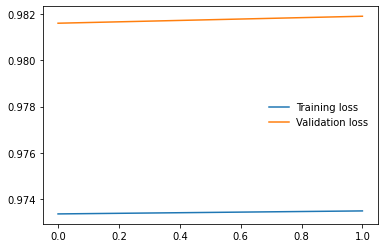

In [235]:
# visualize losses
plt.plot(training_losses, label="Training loss")
plt.plot(validation_losses, label="Validation loss")
plt.legend(frameon=False)

In [251]:
def dice_score(outputs, segmentations): 
  print("DICE SCORE")
  # they find individual
  print("individual")
  # outputs = torch.Size([2, 3, 128, 128, 128])
  # segmentations = torch.Size([2, 3, 128, 128, 128])
  # print(outputs.shape)
  # print(segmentations.shape)
  n_classes = segmentations.shape[1]
  region_dice_scores = []
  for i in range(n_classes):
    outputs = outputs.view(-1)
    segmentations = segmentations.view(-1)
    numerator = 2*(outputs*segmentations).sum()
    denominator = outputs.sum() + segmentations.sum()
    dice = (numerator) / (denominator)
    region_dice_scores.append(dice)
  return region_dice_scores

In [237]:
"""
1 NECROTIC TUMOUR CORE (NCR — label 1) - index 0

2 GD-ENHANCING TUMOUR (ET — label 2) - index 1

3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3) - index 2
"""

'\n1 NECROTIC TUMOUR CORE (NCR — label 1) - index 0\n\n2 GD-ENHANCING TUMOUR (ET — label 2) - index 1\n\n3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3) - index 2\n'

In [238]:
import math

In [239]:
from scipy.spatial.distance import directed_hausdorff

In [255]:
def hausdorff(outputs, segmentations): # for region for every image
  print("HAUSDORFF DISTANCE")
  # print(outputs.shape)
  # print(segmentations.shape)
  # print()
  # for each image in batch
  h_imgs = [0,0,0]
  len_imgs = len(outputs)

  for idx in range(len_imgs): # for each image
    out = outputs[idx]
    seg = segmentations[idx]
    n_classes = out.shape[0]
    # print(n_classes)

    region_hd_scores = []
    for i in range(n_classes): # for each class
      region_out = out[i]
      region_seg = seg[i]
      # print(region_out.shape)
      # print(region_seg.shape)

      # print()
      total_hd_image = 0
      for j in range(region_out.shape[0]): # for each slice
        out_slice = region_out[j]
        seg_slice = region_seg[j]
        # print(out_slice.shape)
        # print(seg_slice.shape)
        a = directed_hausdorff(out_slice, seg_slice)[0]
        b = directed_hausdorff(seg_slice, out_slice)[0]
        hd_slice = max(a, b)
        total_hd_image += hd_slice
      avg_hd_image = total_hd_image/region_out.shape[0]
      # print(avg_hd_image)
      region_hd_scores.append(avg_hd_image)
    # print(region_hd95_scores)
    h_imgs[0] += region_hd_scores[0]
    h_imgs[1] += region_hd_scores[1]
    h_imgs[2] += region_hd_scores[2]
  
  for each in range(len(h_imgs)):
    h_imgs[each] = h_imgs[each]/len_imgs
  
  print(h_imgs)

  return h_imgs

In [256]:
for images, segs in testloader:
    with torch.no_grad(): # no gradients (there's no backprop, only evaluation)
      print(len(images), len(segs))
      print(images.shape)
      print(segs.shape)
      # exclude first dimension of 1
      # images = images.squeeze().clone().detach().requires_grad_(True)
      # segs = segs.long() - no
      # segs = segs.squeeze().clone().detach().requires_grad_(True)
      print(images.shape)
      print(segs.shape)
      segs = segs.squeeze(dim=1)
      outputs, softmax_outputs = model(images) # put images through model
      print(outputs.shape)
      print(softmax_outputs.shape)
      print()

      print("\n", "......."*5, "\n")

      region_dice_scores = dice_score(softmax_outputs, segs)

      print(len(region_dice_scores))
      print(region_dice_scores)
      print()

      print("1 NECROTIC TUMOUR CORE (NCR — label 1)")
      print(region_dice_scores[0].item())
      print()

      print("2 GD-ENHANCING TUMOUR (ET — label 2)")
      print(region_dice_scores[1].item())
      print()

      print("3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)")
      print(region_dice_scores[2].item())

      print("\n", "......."*5, "\n")

      hd_scores = hausdorff(softmax_outputs, segs)

      print()
      print(len(hd_scores))
      print(hd_scores)
      print()

      print("1 NECROTIC TUMOUR CORE (NCR — label 1)")
      print(hd_scores[0])
      print()

      print("2 GD-ENHANCING TUMOUR (ET — label 2)")
      print(hd_scores[1])
      print()

      print("3 PERITUMORAL EDEMATOUS/INVADED TISSUE (ED — label 3)")
      print(hd_scores[2])

2 2
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 1, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
torch.Size([2, 1, 3, 128, 128, 128])
torch.Size([2, 4, 128, 128, 128])
2 4 128 128 128
<built-in method type of Tensor object at 0x7fd4bd0e00b0>
torch.Size([2, 4, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
channel groups
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 8, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])
torch.Size([2, 32, 64, 64, 64])

torch.Size([2, 32, 32, 32, 32])
torch.Size([2, 32, 32, 32, 32])
channel groups
torch.Size([2, 8, 32, 32, 32])
torch.Size([2, 8, 32, 32, 32])
torch.Size([2, 8, 32, 32, 32])
torch.Size([2, 8, 32, 32, 32])
torch.Size([2, 8, 32, 32, 32])
torch.Size([2, 8, 32, 32, 32])
torch.Size([2, 8, 32, 32,